## Read and Clean data

In [543]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
data = pd.read_csv("data.csv", usecols=[
    "Product ID",
    "Product Name",
    "Cathegorie",
    "Product Type",
    "Regions",
    "Where",
    "Additional service ",
    "Unit price ",
    "Sales",
    "Quantity",
    "Sales Last Year",
    "Views",
    "Views Last Year",
    "Quantity Last Year",
    "duration"
])

def sanitize_numbers(df):
    return pd.to_numeric(df.str.replace('Rs.||\s|€|-','', regex=True).str.replace(',', '.')).replace(np.nan, 0)

data = data.rename(columns={
    "Unit price ": "Price",
    "Product Name": "Name",
    "Product ID": "Id",
    "Regions": "Region",
    "Cathegorie": "Category",
    "Product Type": "Type",
    "Where": "Location",
    "duration": "Duration",
    "Additional service ": "Additional Service"
})

data["Price"] = sanitize_numbers(data["Price"])
data["Sales"] = sanitize_numbers(data["Sales"])
data["Sales Last Year"] = sanitize_numbers(data["Sales Last Year"])
data["Views"] = sanitize_numbers(data["Views"])
data["Views Last Year"] = sanitize_numbers(data["Views Last Year"])
data["Views Last Year"] = data["Views Last Year"]
data["Quantity"] = sanitize_numbers(data["Quantity"])
data["Quantity Last Year"] = sanitize_numbers(data["Quantity Last Year"])
data["Name"] = data["Name"].astype("string")
data["Category"] = data["Category"].astype("category")
data["Type"] = data["Type"].astype("string")
data["Region"] = data["Region"].astype("string")
data["Location"] = data["Location"].astype("string")
data["Additional Service"] = data["Additional Service"].astype("string")

In [544]:
from matplotlib.ticker import FormatStrFormatter


def display_series_evolution_with_percentage(source, new):
    evolution = pd.Series((new * 100 / source - 100), name="Evolution (in %)")
    display(pd.concat([source, new, evolution], axis=1).sort_values(by=evolution.name))

def display_conversion_rates(views, quantities):
    conversion_name = "Conversion Rate (in %)"
    conversion_rates = pd.Series((quantities * 100 / views), name=conversion_name)
    display(pd.concat([views, quantities, conversion_rates], axis=1).sort_values(by=conversion_name))
    return conversion_rates

def plot_series_evolution_as_barh(source, new, barh_title, source_label="last year", new_label="this year", x_asunit=True):
    df = pd.DataFrame({new_label: new, source_label: source}, index=new.keys())
    ax = df.plot.barh(figsize=(15, 5))
    if x_asunit:
        ax.xaxis.set_major_formatter(FormatStrFormatter('%1d'))
    ax.set_title(barh_title)

def display_serie_weight(serie, total):
    weight_name = "Weight (in %)"
    weight = pd.Series((serie * 100 / total), name=weight_name)
    display(pd.concat([serie, weight], axis=1).sort_values(by=weight_name))

def plot_as_pie(serie, pie_title):
    _, ax = plt.subplots()
    ax.pie(serie, labels=serie.keys(), autopct='%1.1f%%')
    ax.set_title(pie_title)

def plot_as_barh(serie, barh_title, x_asunit=True):
    df = pd.DataFrame(serie, index=serie.keys())
    ax = df.plot.barh(figsize=(10, 50))
    if x_asunit:
        ax.xaxis.set_major_formatter(FormatStrFormatter('%1d'))
    ax.set_title(barh_title)


## Basic description

In [545]:
data.describe(exclude=["int64", "string", "category"])

,Id,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
count,4.790000e+02,310.000000,480.000000,4.800000e+02,480.000000,480.000000,480.000000,480.000000,480.000000
mean,1.388037e+06,39.077419,371.187708,6.821705e+03,1259.745833,34.195833,3459.038542,1210.639583,18.308333
std,2.327043e+05,21.523235,632.900189,7.670627e+04,14116.118825,383.877475,38996.379984,13669.865939,206.296301
min,1.650000e+03,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.385954e+06,20.000000,153.475000,0.000000e+00,22.000000,0.000000,0.000000,0.000000,0.000000
50%,1.461178e+06,30.000000,215.400000,2.215500e+02,83.500000,1.000000,0.000000,42.000000,0.000000
75%,1.490514e+06,60.000000,359.150000,1.119300e+03,298.000000,6.000000,465.750000,296.250000,2.000000
max,1.520353e+06,150.000000,7531.900000,1.637209e+06,302344.000000,8204.000000,830169.250000,290549.000000,4381.000000


In [546]:
last_year = pd.Series({"Views": data["Views Last Year"].sum(), "Quantities": data["Quantity Last Year"].sum(), "Sales": data["Sales Last Year"].sum()}, name="Last Year")
this_year = pd.Series({"Views": data["Views"].sum(), "Quantities": data["Quantity"].sum(), "Sales": data["Sales"].sum()}, name="This Year")
display_series_evolution_with_percentage(last_year, this_year)

,Last Year,This Year,Evolution (in %)
Views,581107.0,604678.00,4.056224
Quantities,8788.0,16414.00,86.777424
Sales,1660338.5,3274418.53,97.213913


# Analysis: Aggregates (Categories, Regions, Duration, Product Types) vs Indicators (Sales, Quantities, Conversion Rate)

## --- Categories ---

### Categories Weight in last year's Sales


In [547]:
total_sales = data["Sales"].sum()
total_sales_last_year = data["Sales Last Year"].sum()

sales_by_category = pd.Series(data.groupby("Category")["Sales"].sum(), name="Sales (in euros)")
sales_by_category_last_year = pd.Series(data.groupby("Category")["Sales Last Year"].sum(), name="Sales Last Year (in euros)")

Total sales last year: 1660338.5 euros


,Sales Last Year (in euros),Weight (in %)
Category,,
Free-fall simulator,0.00,0.000000
Gravity-free flight,0.00,0.000000
Flight simulator,1914.75,0.115323
Fighter aircraft,9082.83,0.547047
ULM/Plane,144546.83,8.705865
Helicopter,171365.51,10.321119
Hot air balloon,503259.33,30.310646


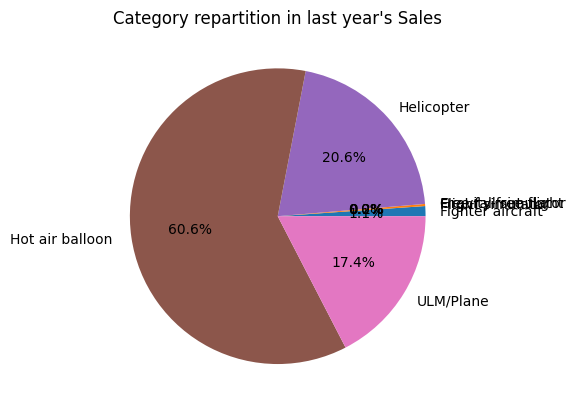

In [548]:
print(f'Total sales last year: {total_sales_last_year} euros')

display_serie_weight(
    serie=sales_by_category_last_year,
    total=total_sales_last_year,
)
plot_as_pie(serie=sales_by_category_last_year, pie_title="Category repartition in last year's Sales")


### Categories Weight in this year's Sales



Total sales this year: 3274418.53 euros


,Sales (in euros),Weight (in %)
Category,,
Free-fall simulator,0.00,0.000000
Gravity-free flight,0.00,0.000000
Flight simulator,3379.95,0.103223
Fighter aircraft,8937.02,0.272935
ULM/Plane,165072.77,5.041285
Helicopter,230993.12,7.054478
Hot air balloon,1228826.44,37.528081


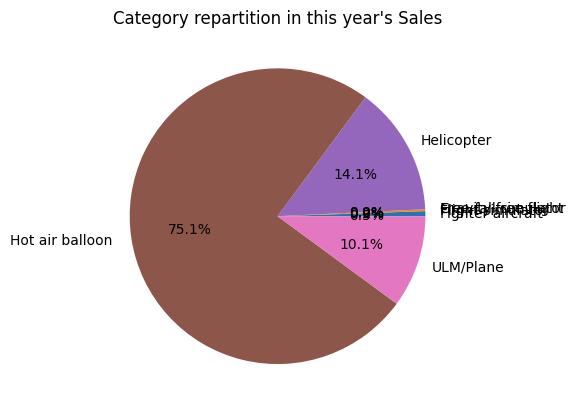

In [549]:
print(f'Total sales this year: {total_sales} euros')

display_serie_weight(
    serie=sales_by_category,
    total=total_sales,
)
plot_as_pie(serie=sales_by_category, pie_title="Category repartition in this year's Sales")

### Sales evolution by Category

,Sales Last Year (in euros),Sales (in euros),Evolution (in %)
Category,,,
Fighter aircraft,9082.83,8937.02,-1.605337
ULM/Plane,144546.83,165072.77,14.200201
Helicopter,171365.51,230993.12,34.795572
Flight simulator,1914.75,3379.95,76.521739
Hot air balloon,503259.33,1228826.44,144.173603
Free-fall simulator,0.00,0.00,NaN
Gravity-free flight,0.00,0.00,NaN


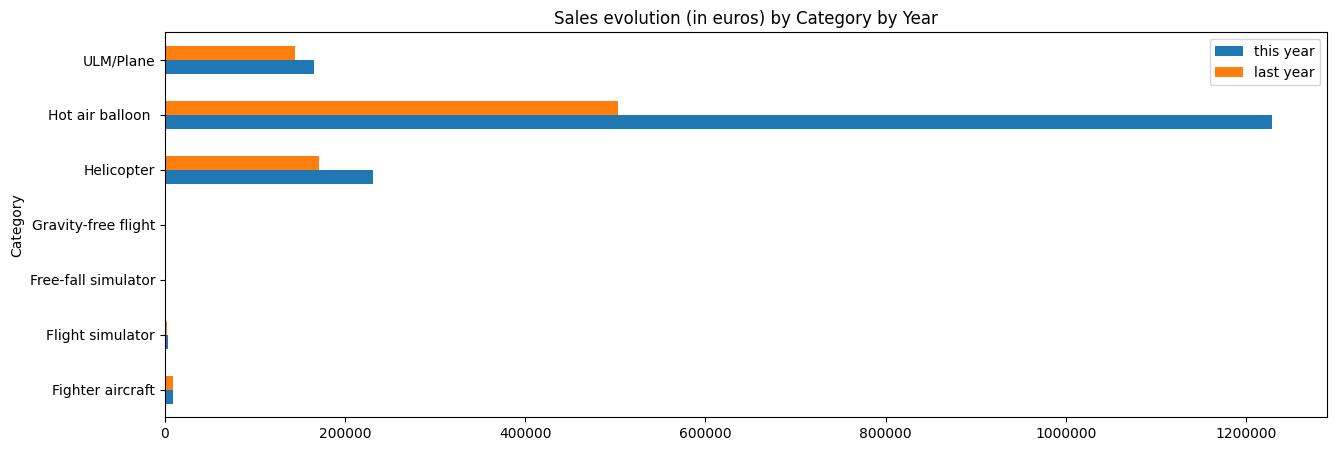

In [550]:
display_series_evolution_with_percentage(source=sales_by_category_last_year, new=sales_by_category)
plot_series_evolution_as_barh(
    source=sales_by_category_last_year,
    new=sales_by_category,
    barh_title="Sales evolution (in euros) by Category by Year"
)

### Categories Weight in last year's Quantities

In [551]:
total_qtt = data["Quantity"].sum()
total_qtt_last_year = data["Quantity Last Year"].sum()

quantity_by_category = pd.Series(data.groupby("Category")["Quantity"].sum(), name="Sales (in quantity)")
quantity_by_category_last_year = pd.Series(data.groupby("Category")["Quantity Last Year"].sum(), name="Sales Last Year (in quantity)")

Total quantities last year: 8788.0 units


,Sales Last Year (in quantity),Weight (in %)
Category,,
Free-fall simulator,0.0,0.000000
Gravity-free flight,0.0,0.000000
Fighter aircraft,4.0,0.045517
Flight simulator,19.0,0.216204
Helicopter,791.0,9.000910
ULM/Plane,1392.0,15.839782
Hot air balloon,2201.0,25.045517


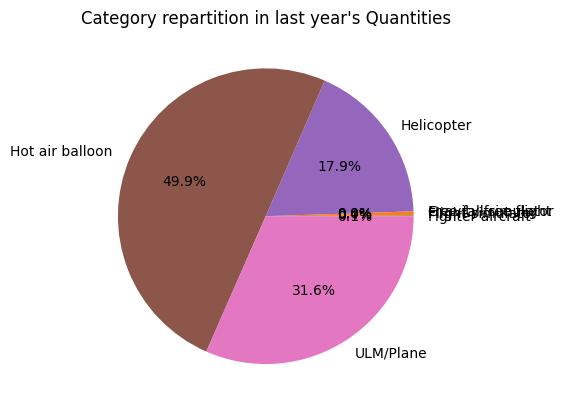

In [552]:
print(f'Total quantities last year: {total_qtt_last_year} units')

display_serie_weight(
    serie=quantity_by_category_last_year,
    total=total_qtt_last_year,
)
plot_as_pie(serie=quantity_by_category_last_year, pie_title="Category repartition in last year's Quantities")

### Categories Weight in this year's Quantities

Total quantities this year: 16414.0 units


,Sales (in quantity),Weight (in %)
Category,,
Free-fall simulator,0.0,0.000000
Gravity-free flight,0.0,0.000000
Fighter aircraft,3.0,0.018277
Flight simulator,34.0,0.207140
Helicopter,1188.0,7.237724
ULM/Plane,1616.0,9.845254
Hot air balloon,5369.0,32.709882


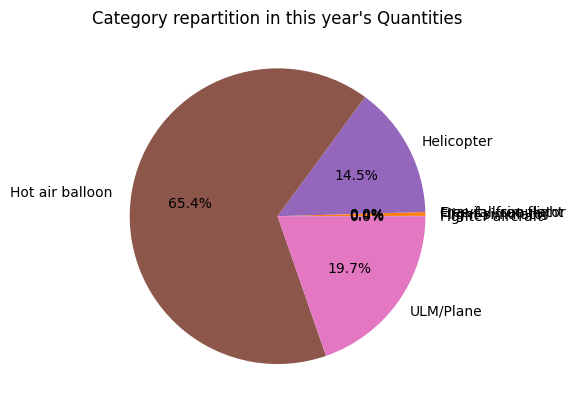

In [553]:
print(f'Total quantities this year: {total_qtt} units')

display_serie_weight(
    serie=quantity_by_category,
    total=total_qtt,
)
plot_as_pie(serie=quantity_by_category, pie_title="Category repartition in this year's Quantities")

### Quantities evolution by Category

,Sales Last Year (in quantity),Sales (in quantity),Evolution (in %)
Category,,,
Fighter aircraft,4.0,3.0,-25.000000
ULM/Plane,1392.0,1616.0,16.091954
Helicopter,791.0,1188.0,50.189633
Flight simulator,19.0,34.0,78.947368
Hot air balloon,2201.0,5369.0,143.934575
Free-fall simulator,0.0,0.0,NaN
Gravity-free flight,0.0,0.0,NaN


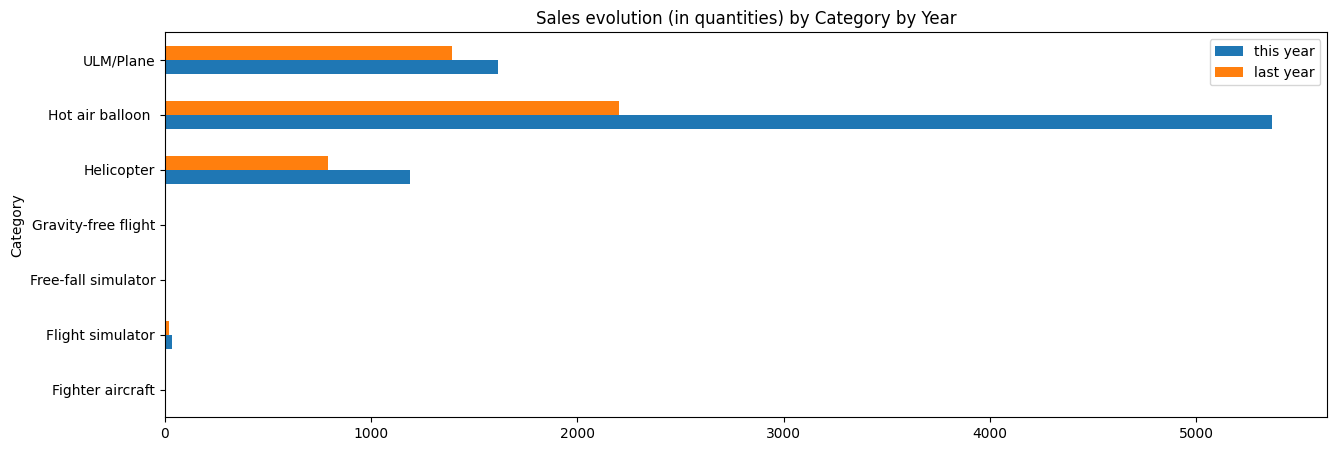

In [554]:
display_series_evolution_with_percentage(source=quantity_by_category_last_year, new=quantity_by_category)
plot_series_evolution_as_barh(
    source=quantity_by_category_last_year,
    new=quantity_by_category,
    barh_title="Sales evolution (in quantities) by Category by Year"
)

### Conversion Rate Evolution By Category

In [555]:
data["Conversion Rate"] =  data["Quantity"] * 100 / data["Views"]
data["Conversion Rate Last Year"] =  data["Quantity Last Year"] * 100 / data["Views Last Year"]

views_by_category = data.groupby("Category")["Views"].sum()
views_by_category_last_year = data.groupby("Category")["Views Last Year"].sum()

,Views Last Year,Sales Last Year (in quantity),Conversion Rate (in %)
Category,,,
Free-fall simulator,15.0,0.0,0.000000
Gravity-free flight,335.0,0.0,0.000000
Fighter aircraft,5440.0,4.0,0.073529
Hot air balloon,169042.0,2201.0,1.302043
Helicopter,51810.0,791.0,1.526732
Flight simulator,919.0,19.0,2.067465
ULM/Plane,62997.0,1392.0,2.209629


,Views,Sales (in quantity),Conversion Rate (in %)
Category,,,
Gravity-free flight,1128.0,0.0,0.000000
Fighter aircraft,8172.0,3.0,0.036711
Helicopter,60097.0,1188.0,1.976804
Hot air balloon,189604.0,5369.0,2.831691
Flight simulator,1132.0,34.0,3.003534
ULM/Plane,42201.0,1616.0,3.829293
Free-fall simulator,0.0,0.0,NaN


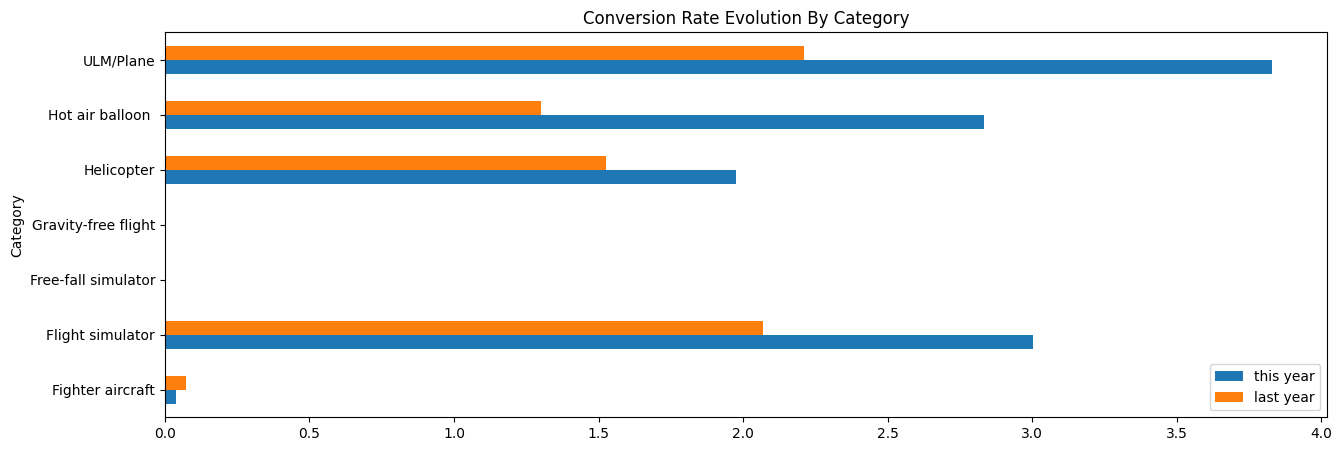

In [556]:
conversion_rate_by_category_last_year = display_conversion_rates(
    views=views_by_category_last_year,
    quantities=quantity_by_category_last_year
)

conversion_rate_by_category = display_conversion_rates(
    views=views_by_category,
    quantities=quantity_by_category
)

plot_series_evolution_as_barh(
    source=conversion_rate_by_category_last_year,
    new=conversion_rate_by_category,
    barh_title="Conversion Rate Evolution By Category",
    x_asunit=False
)

## --- Regions ---


### Regions Weight in last year's Sales

In [557]:
sales_by_region = pd.Series(data.groupby("Region")["Sales"].sum(), name="Sales (in euros)")
sales_by_region_last_year = pd.Series(data.groupby("Region")["Sales Last Year"].sum(), name="Sales Last Year (in euros)")

Total sales last year: 1660338.5 euros


,Sales Last Year (in euros),Weight (in %)
Region,,
Bretagne,0.00,0.000000
Corse,0.00,0.000000
Grand-Est,0.00,0.000000
Pays-De-La-Loire,782.92,0.047154
Bourgogne-Franche-Comté,1494.83,0.090032
Offre en dehors France,4790.83,0.288545
Hauts-de-France,7935.17,0.477925
Occitanie,10929.57,0.658274
PACA,12512.50,0.753611


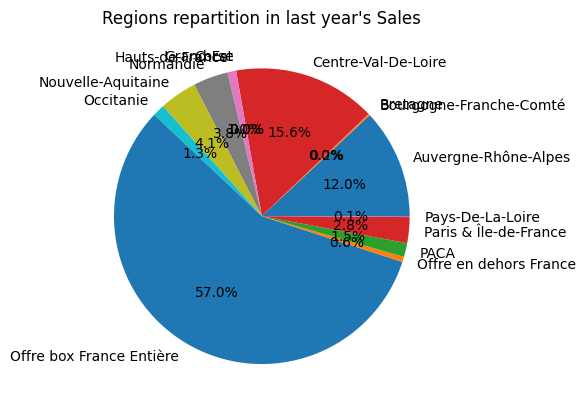

In [558]:
print(f'Total sales last year: {total_sales_last_year} euros')

display_serie_weight(
    serie=sales_by_region_last_year,
    total=total_sales_last_year,
)
plot_as_pie(serie=sales_by_region_last_year, pie_title="Regions repartition in last year's Sales")

### Regions weight in this year's Sales

Total sales last year: 3274418.53 euros


,Sales (in euros),Weight (in %)
Region,,
Corse,0.00,0.000000
Offre en dehors France,4047.99,0.123625
Pays-De-La-Loire,4695.01,0.143385
Bretagne,5007.68,0.152933
PACA,12673.17,0.387036
Grand-Est,18537.76,0.566139
Hauts-de-France,22175.77,0.677243
Occitanie,27124.78,0.828385
Normandie,39126.36,1.194910


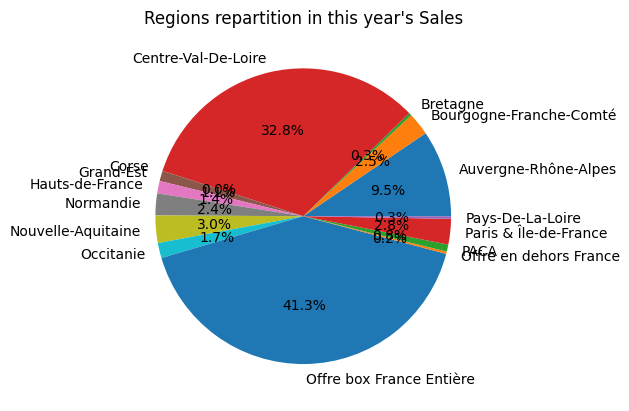

In [559]:
print(f'Total sales last year: {total_sales} euros')

display_serie_weight(
    serie=sales_by_region,
    total=total_sales,
)
plot_as_pie(serie=sales_by_region, pie_title="Regions repartition in this year's Sales")

### Sales evolution by Region

,Sales Last Year (in euros),Sales (in euros),Evolution (in %)
Region,,,
Offre en dehors France,4790.83,4047.99,-15.505455
PACA,12512.50,12673.17,1.284076
Normandie,31604.17,39126.36,23.801258
Offre box France Entière,473295.17,676695.48,42.975361
Nouvelle-Aquitaine,34097.49,48995.70,43.692982
Auvergne-Rhône-Alpes,99454.25,155318.22,56.170521
Paris & Île-de-France,23511.01,45698.93,94.372466
Occitanie,10929.57,27124.78,148.177925
Hauts-de-France,7935.17,22175.77,179.461814


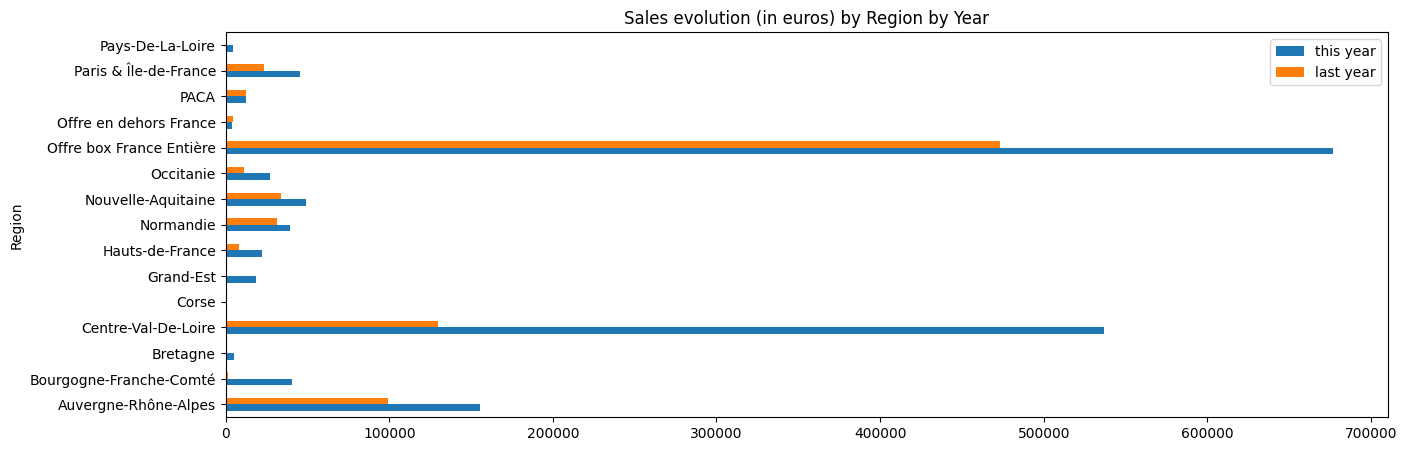

In [560]:
display_series_evolution_with_percentage(source=sales_by_region_last_year, new=sales_by_region)
plot_series_evolution_as_barh(
    source=sales_by_region_last_year,
    new=sales_by_region,
    barh_title="Sales evolution (in euros) by Region by Year"
)

### Regions Weight in last year's Quantities

In [561]:
quantity_by_region = pd.Series(data.groupby("Region")["Quantity"].sum(), name="Sales (in quantity)")
quantity_by_region_last_year = pd.Series(data.groupby("Region")["Quantity Last Year"].sum(), name="Sales Last Year (in quantity)")

Total quantities last year: 8788.0 euros


,Sales Last Year (in quantity),Weight (in %)
Region,,
Bretagne,0.0,0.000000
Corse,0.0,0.000000
Grand-Est,0.0,0.000000
Offre en dehors France,2.0,0.022758
Pays-De-La-Loire,5.0,0.056896
Bourgogne-Franche-Comté,11.0,0.125171
Occitanie,61.0,0.694128
PACA,66.0,0.751024
Hauts-de-France,112.0,1.274465


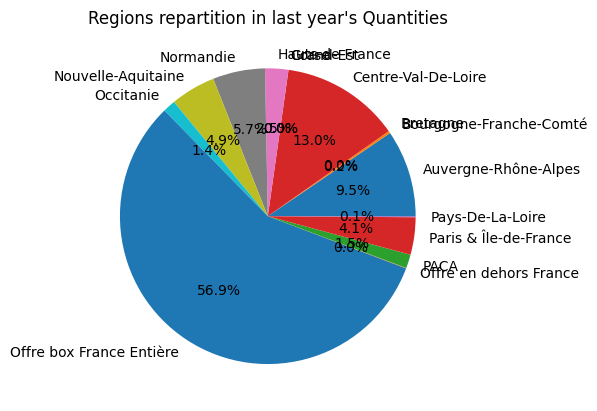

In [562]:
print(f'Total quantities last year: {total_qtt_last_year} euros')

display_serie_weight(
    serie=quantity_by_region_last_year,
    total=total_qtt_last_year,
)
plot_as_pie(serie=quantity_by_region_last_year, pie_title="Regions repartition in last year's Quantities")

### Regions Weight in this year's Quantities


Total quantities this year: 16414.0 units


,Sales (in quantity),Weight (in %)
Region,,
Corse,0.0,0.000000
Offre en dehors France,3.0,0.018277
Bretagne,31.0,0.188863
Pays-De-La-Loire,31.0,0.188863
Grand-Est,65.0,0.396003
PACA,69.0,0.420373
Occitanie,105.0,0.639698
Bourgogne-Franche-Comté,196.0,1.194103
Nouvelle-Aquitaine,291.0,1.772877


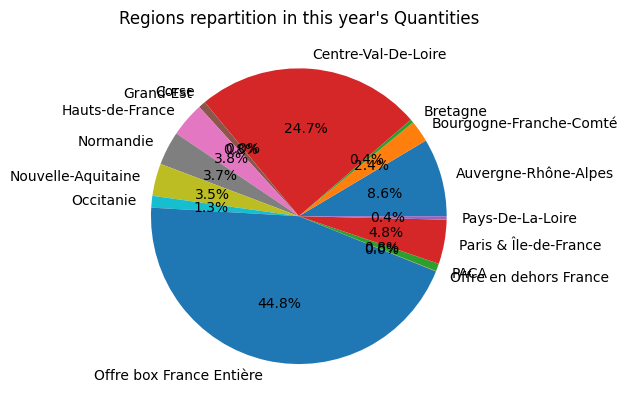

In [563]:
print(f'Total quantities this year: {total_qtt} units')

display_serie_weight(
    serie=quantity_by_region,
    total=total_qtt,
)
plot_as_pie(serie=quantity_by_region, pie_title="Regions repartition in this year's Quantities")

### Quantities evolution by Region

,Sales Last Year (in quantity),Sales (in quantity),Evolution (in %)
Region,,,
PACA,66.0,69.0,4.545455
Normandie,252.0,304.0,20.634921
Nouvelle-Aquitaine,217.0,291.0,34.101382
Offre box France Entière,2509.0,3681.0,46.711837
Offre en dehors France,2.0,3.0,50.000000
Auvergne-Rhône-Alpes,419.0,702.0,67.541766
Occitanie,61.0,105.0,72.131148
Paris & Île-de-France,180.0,397.0,120.555556
Hauts-de-France,112.0,310.0,176.785714


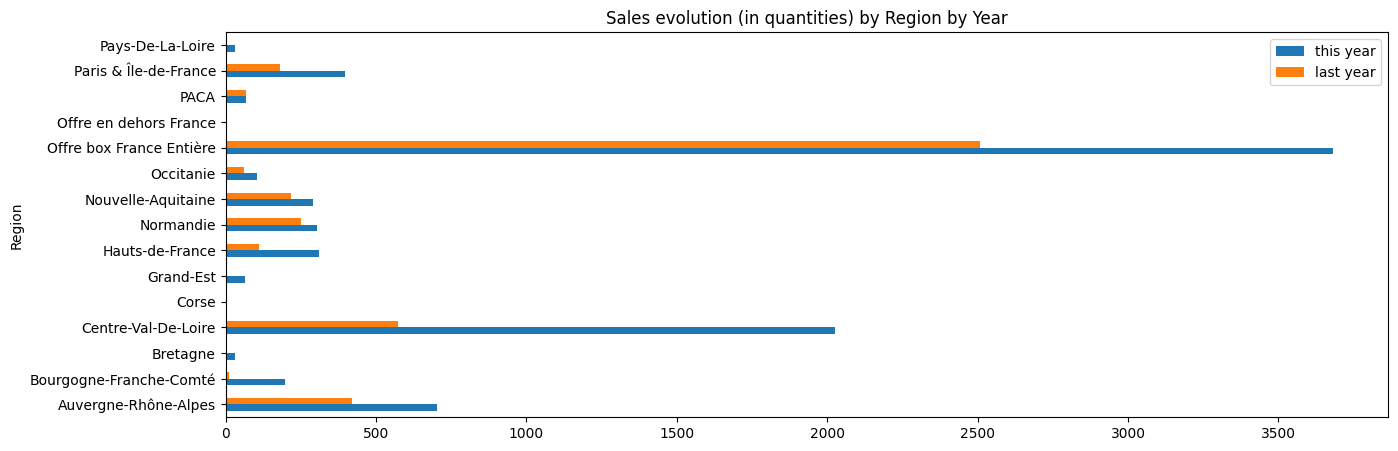

In [564]:
display_series_evolution_with_percentage(source=quantity_by_region_last_year, new=quantity_by_region)
plot_series_evolution_as_barh(
    source=quantity_by_region_last_year,
    new=quantity_by_region,
    barh_title="Sales evolution (in quantities) by Region by Year"
)

### Conversion Rate evolution by Region

,Views Last Year,Sales Last Year (in quantity),Conversion Rate (in %)
Region,,,
Offre en dehors France,5583.0,2.0,0.035823
Bourgogne-Franche-Comté,1845.0,11.0,0.596206
Pays-De-La-Loire,551.0,5.0,0.907441
Centre-Val-De-Loire,42628.0,573.0,1.344187
Offre box France Entière,180055.0,2509.0,1.393463
PACA,3866.0,66.0,1.707191
Nouvelle-Aquitaine,12459.0,217.0,1.741713
Paris & Île-de-France,9080.0,180.0,1.982379
Hauts-de-France,5012.0,112.0,2.234637


,Views,Sales (in quantity),Conversion Rate (in %)
Region,,,
Corse,29.0,0.0,0.000000
Offre en dehors France,5724.0,3.0,0.052411
PACA,2991.0,69.0,2.306921
Pays-De-La-Loire,1343.0,31.0,2.308265
Nouvelle-Aquitaine,12322.0,291.0,2.361630
Offre box France Entière,145123.0,3681.0,2.536469
Auvergne-Rhône-Alpes,27213.0,702.0,2.579649
Occitanie,3941.0,105.0,2.664298
Bourgogne-Franche-Comté,7002.0,196.0,2.799200


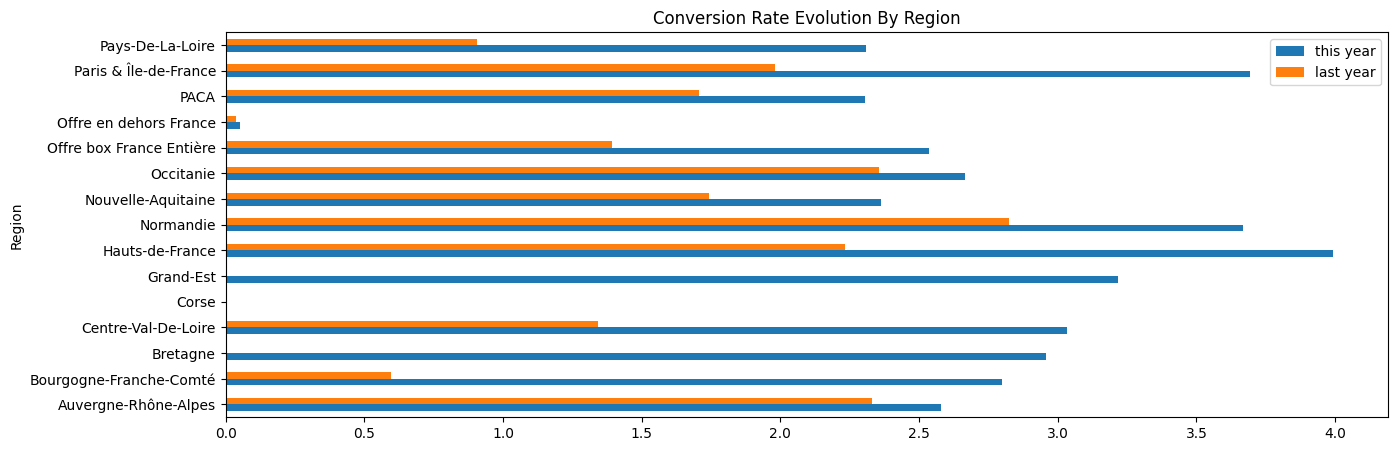

In [565]:
views_by_region = data.groupby("Region")["Views"].sum()
views_by_region_last_year = data.groupby("Region")["Views Last Year"].sum()

conversion_rate_by_region_last_year = display_conversion_rates(
    views=views_by_region_last_year,
    quantities=quantity_by_region_last_year
)

conversion_rate_by_region = display_conversion_rates(
    views=views_by_region,
    quantities=quantity_by_region
)

plot_series_evolution_as_barh(
    source=conversion_rate_by_region_last_year,
    new=conversion_rate_by_region,
    barh_title="Conversion Rate Evolution By Region",
    x_asunit=False
)

## --- Duration ---

### Duration weight in last year's Sales

In [566]:
dur_sales_last_year = data.loc[~pd.isna(data["Duration"])]["Sales Last Year"].sum()
dur_sales_last_year_count = data.loc[~pd.isna(data["Duration"])]["Sales Last Year"].count()
dur_sales = data.loc[~pd.isna(data["Duration"])]["Sales"].sum()
dur_sales_count = data.loc[~pd.isna(data["Duration"])]["Sales"].count()

sales_by_duration = pd.Series(data.groupby("Duration")["Sales"].sum(), name="Sales (in euros)")
sales_by_duration_last_year = pd.Series(data.groupby("Duration")["Sales Last Year"].sum(), name="Sales Last Year (in euros)")

Total sales of products with a specified duration last year: 203069.34 euros over 310 rows


,Sales Last Year (in euros),Weight (in %)
Duration,,
10.0,0.00,0.000000
80.0,0.00,0.000000
70.0,0.00,0.000000
55.0,0.00,0.000000
105.0,0.00,0.000000
150.0,0.00,0.000000
22.0,0.00,0.000000
12.0,0.00,0.000000
35.0,183.25,0.090240


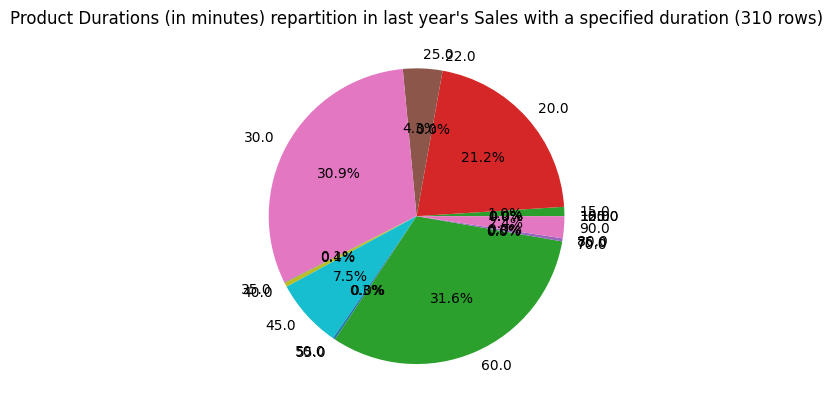

In [567]:
print(f'Total sales of products with a specified duration last year: {dur_sales_last_year} euros over {dur_sales_last_year_count} rows')

display_serie_weight(
    serie=sales_by_duration_last_year,
    total=dur_sales_last_year,
)
plot_as_pie(
    serie=sales_by_duration_last_year,
    pie_title=f"Product Durations (in minutes) repartition in last year's Sales with a specified duration ({dur_sales_last_year_count} rows)"
)

### Weight of Duration in this year's Sales

Total sales of products with a specified duration this year: 616964.4199999999 euros over 310 rows


,Sales (in euros),Weight (in %)
Duration,,
12.0,0.00,0.000000
22.0,0.00,0.000000
55.0,0.00,0.000000
105.0,0.00,0.000000
70.0,559.65,0.090710
40.0,600.60,0.097348
150.0,793.22,0.128568
35.0,1119.30,0.181421
75.0,1568.58,0.254242


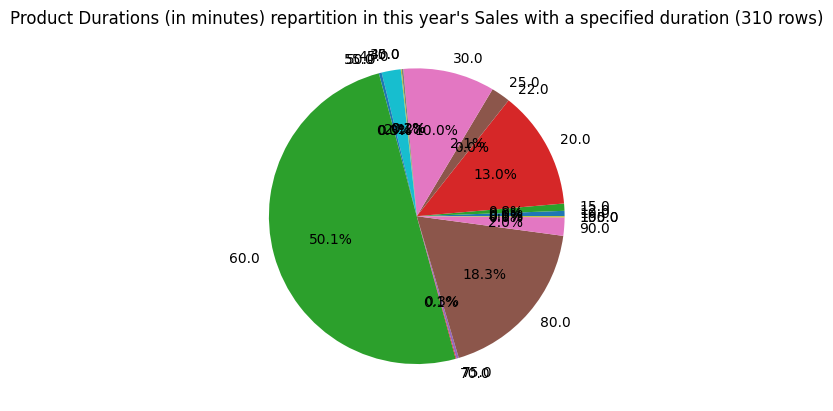

In [568]:
print(f'Total sales of products with a specified duration this year: {dur_sales} euros over {dur_sales_count} rows')

display_serie_weight(
    serie=sales_by_duration,
    total=dur_sales,
)
plot_as_pie(
    serie=sales_by_duration,
    pie_title=f"Product Durations (in minutes) repartition in this year's Sales with a specified duration ({dur_sales_count} rows)"
)

### Sales evolution by Duration

,Sales Last Year (in euros),Sales (in euros),Evolution (in %)
Duration,,,
40.0,913.08,600.60,-34.222631
45.0,15270.67,12861.58,-15.775929
30.0,62728.09,61837.64,-1.419539
25.0,8752.59,12956.41,48.029440
20.0,42974.59,79963.59,86.071793
75.0,666.50,1568.58,135.345836
15.0,2063.08,4871.53,136.128992
90.0,4874.08,12321.28,152.791911
50.0,508.33,1912.52,276.235910


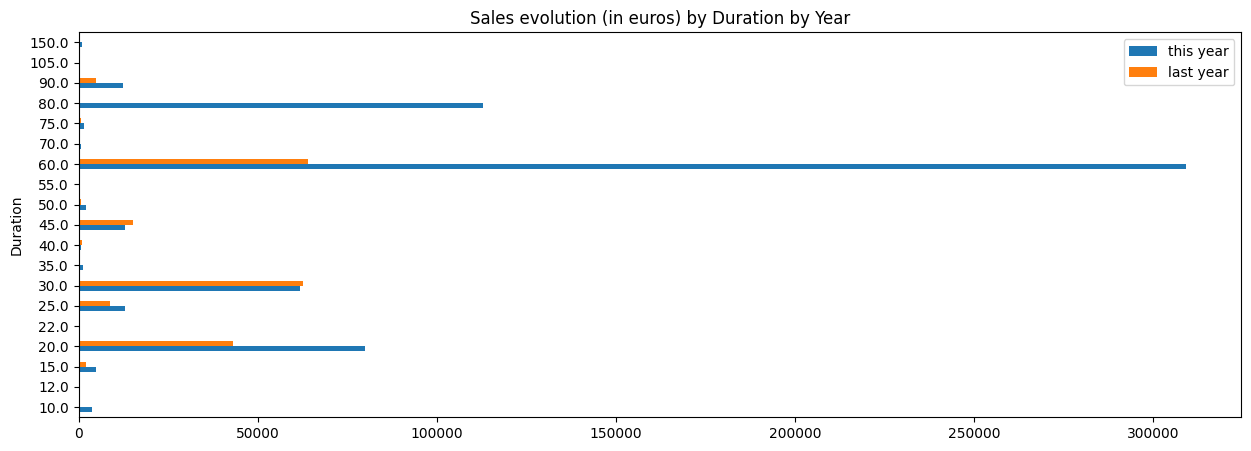

In [569]:
display_series_evolution_with_percentage(source=sales_by_duration_last_year, new=sales_by_duration)
plot_series_evolution_as_barh(
    source=sales_by_duration_last_year,
    new=sales_by_duration,
    barh_title="Sales evolution (in euros) by Duration by Year"
)

### Weight of Duration in last year's Quantities


In [570]:
dur_qtt_last_year = data.loc[~pd.isna(data["Duration"])]["Quantity Last Year"].sum()
dur_qtt_last_year_count = data.loc[~pd.isna(data["Duration"])]["Quantity Last Year"].count()
dur_qtt = data.loc[~pd.isna(data["Duration"])]["Quantity"].sum()
dur_qtt_count = data.loc[~pd.isna(data["Duration"])]["Quantity"].count()

qtt_by_duration = pd.Series(data.groupby("Duration")["Quantity"].sum(), name="Sales (in quantities)")
qtt_by_duration_last_year = pd.Series(data.groupby("Duration")["Quantity Last Year"].sum(), name="Sales Last Year (in quantities)")

Total sales of products with a specified duration last year: 1027.0 euros over 310 rows


,Sales Last Year (in quantities),Weight (in %)
Duration,,
10.0,0.0,0.000000
80.0,0.0,0.000000
70.0,0.0,0.000000
55.0,0.0,0.000000
105.0,0.0,0.000000
150.0,0.0,0.000000
22.0,0.0,0.000000
12.0,0.0,0.000000
35.0,1.0,0.097371


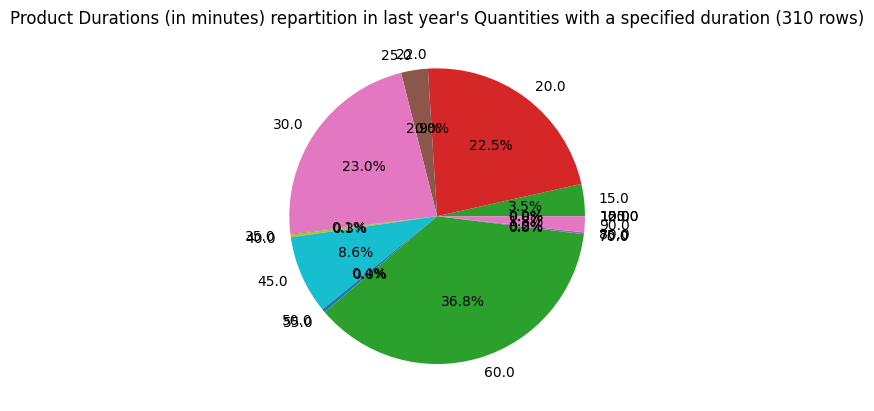

In [571]:
print(f'Total sales of products with a specified duration last year: {dur_qtt_last_year} euros over {dur_qtt_last_year_count} rows')

display_serie_weight(
    serie=qtt_by_duration_last_year,
    total=dur_qtt_last_year,
)
plot_as_pie(
    serie=qtt_by_duration_last_year,
    pie_title=f"Product Durations (in minutes) repartition in last year's Quantities with a specified duration ({dur_qtt_last_year_count} rows)"
)

### Weight of Duration in this year's Quantities


Total sales of products with a specified duration last year: 2867.0 euros over 310 rows


,Sales (in quantities),Weight (in %)
Duration,,
12.0,0.0,0.000000
22.0,0.0,0.000000
55.0,0.0,0.000000
105.0,0.0,0.000000
150.0,1.0,0.034880
40.0,2.0,0.069759
70.0,4.0,0.139519
75.0,5.0,0.174398
35.0,7.0,0.244158


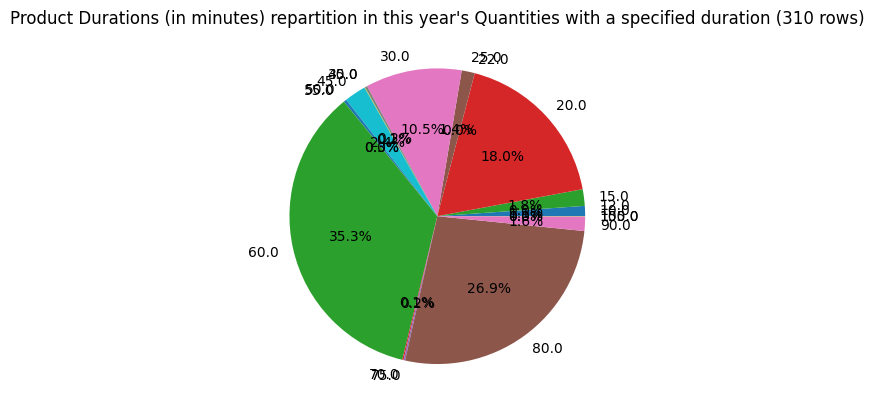

In [572]:
print(f'Total sales of products with a specified duration last year: {dur_qtt} euros over {dur_qtt_count} rows')

display_serie_weight(
    serie=qtt_by_duration,
    total=dur_qtt,
)
plot_as_pie(
    serie=qtt_by_duration,
    pie_title=f"Product Durations (in minutes) repartition in this year's Quantities with a specified duration ({dur_qtt_count} rows)"
)

### Quantities evolution by Duration

,Sales Last Year (in quantities),Sales (in quantities),Evolution (in %)
Duration,,,
40.0,3.0,2.0,-33.333333
45.0,88.0,68.0,-22.727273
30.0,236.0,302.0,27.966102
25.0,30.0,41.0,36.666667
15.0,36.0,52.0,44.444444
20.0,231.0,516.0,123.376623
50.0,4.0,9.0,125.000000
75.0,2.0,5.0,150.000000
90.0,18.0,45.0,150.000000


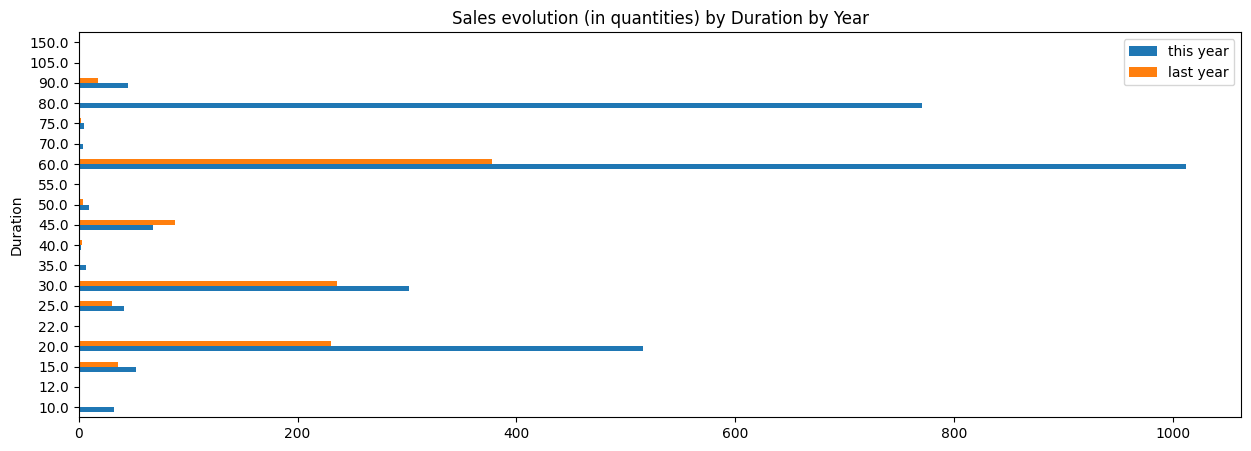

In [573]:
display_series_evolution_with_percentage(source=qtt_by_duration_last_year, new=qtt_by_duration)
plot_series_evolution_as_barh(
    source=qtt_by_duration_last_year,
    new=qtt_by_duration,
    barh_title="Sales evolution (in quantities) by Duration by Year"
)

## --- Product Types ---

### Weight of Product Types in Last Year's Sales

In [574]:
sales_by_product_type = pd.Series(data.groupby("Type")["Sales"].sum(), name="Sales (in euros)")
sales_by_product_type_last_year = pd.Series(data.groupby("Type")["Sales Last Year"].sum(), name="Sales Last Year (in euros)")

pd.set_option('display.max_rows', None)

Total sales last year: 1660338.5 euros


,Sales Last Year (in euros),Weight (in %)
Type,,
(Durée) Survol,0.00,0.000000
Un vol en,0.00,0.000000
Un vol,0.00,0.000000
Un tour découverte en hélicoptère,0.00,0.000000
Un tour,0.00,0.000000
Survol en duo,0.00,0.000000
Survol (Durée),0.00,0.000000
Simulateur de chute libre,0.00,0.000000
Promenade originale,0.00,0.000000


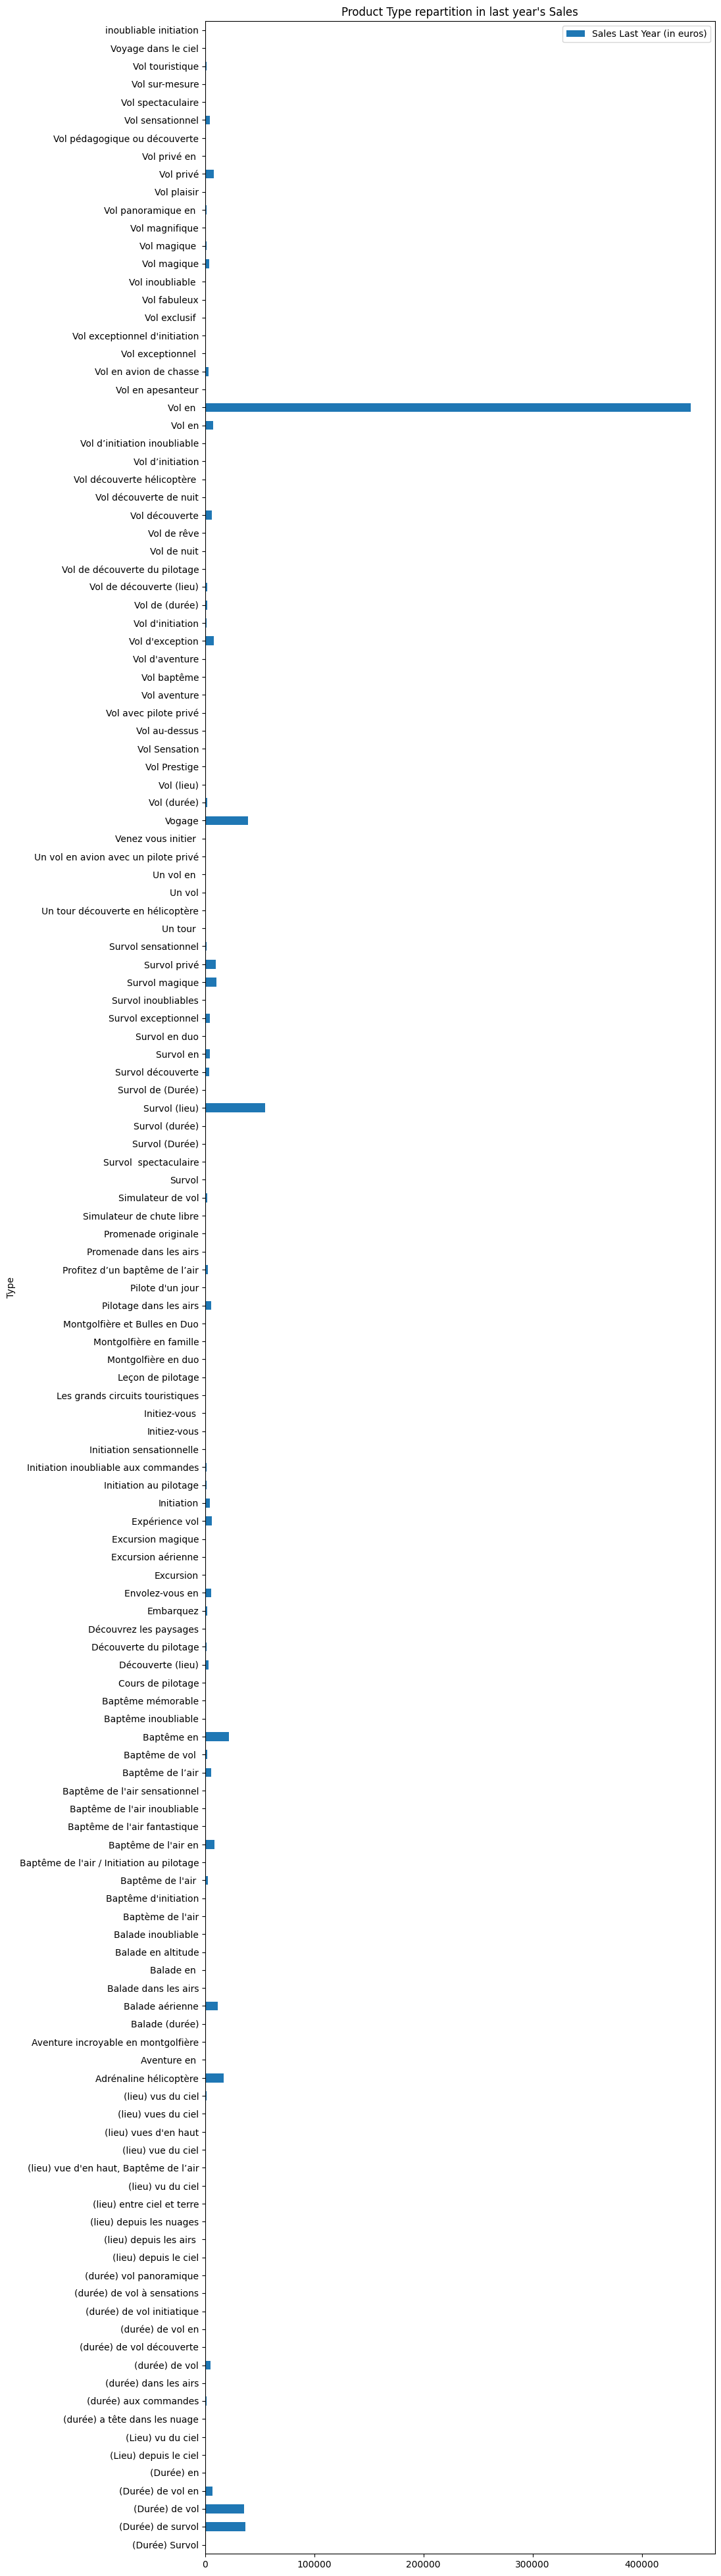

In [575]:
print(f'Total sales last year: {total_sales_last_year} euros')

display_serie_weight(serie=sales_by_product_type_last_year, total=total_sales_last_year)
plot_as_barh(serie=sales_by_product_type_last_year, barh_title=f"Product Type repartition in last year's Sales")

### Weight of Product Types in this Year's Sales

Total sales this year: 3274418.53 euros


,Sales (in euros),Weight (in %)
Type,,
Pilote d'un jour,0.00,0.000000
Balade en altitude,0.00,0.000000
Vol exceptionnel,0.00,0.000000
Vol en avion de chasse,0.00,0.000000
Vol en apesanteur,0.00,0.000000
Baptême inoubliable,0.00,0.000000
Baptême mémorable,0.00,0.000000
Vol découverte de nuit,0.00,0.000000
Découvrez les paysages,0.00,0.000000


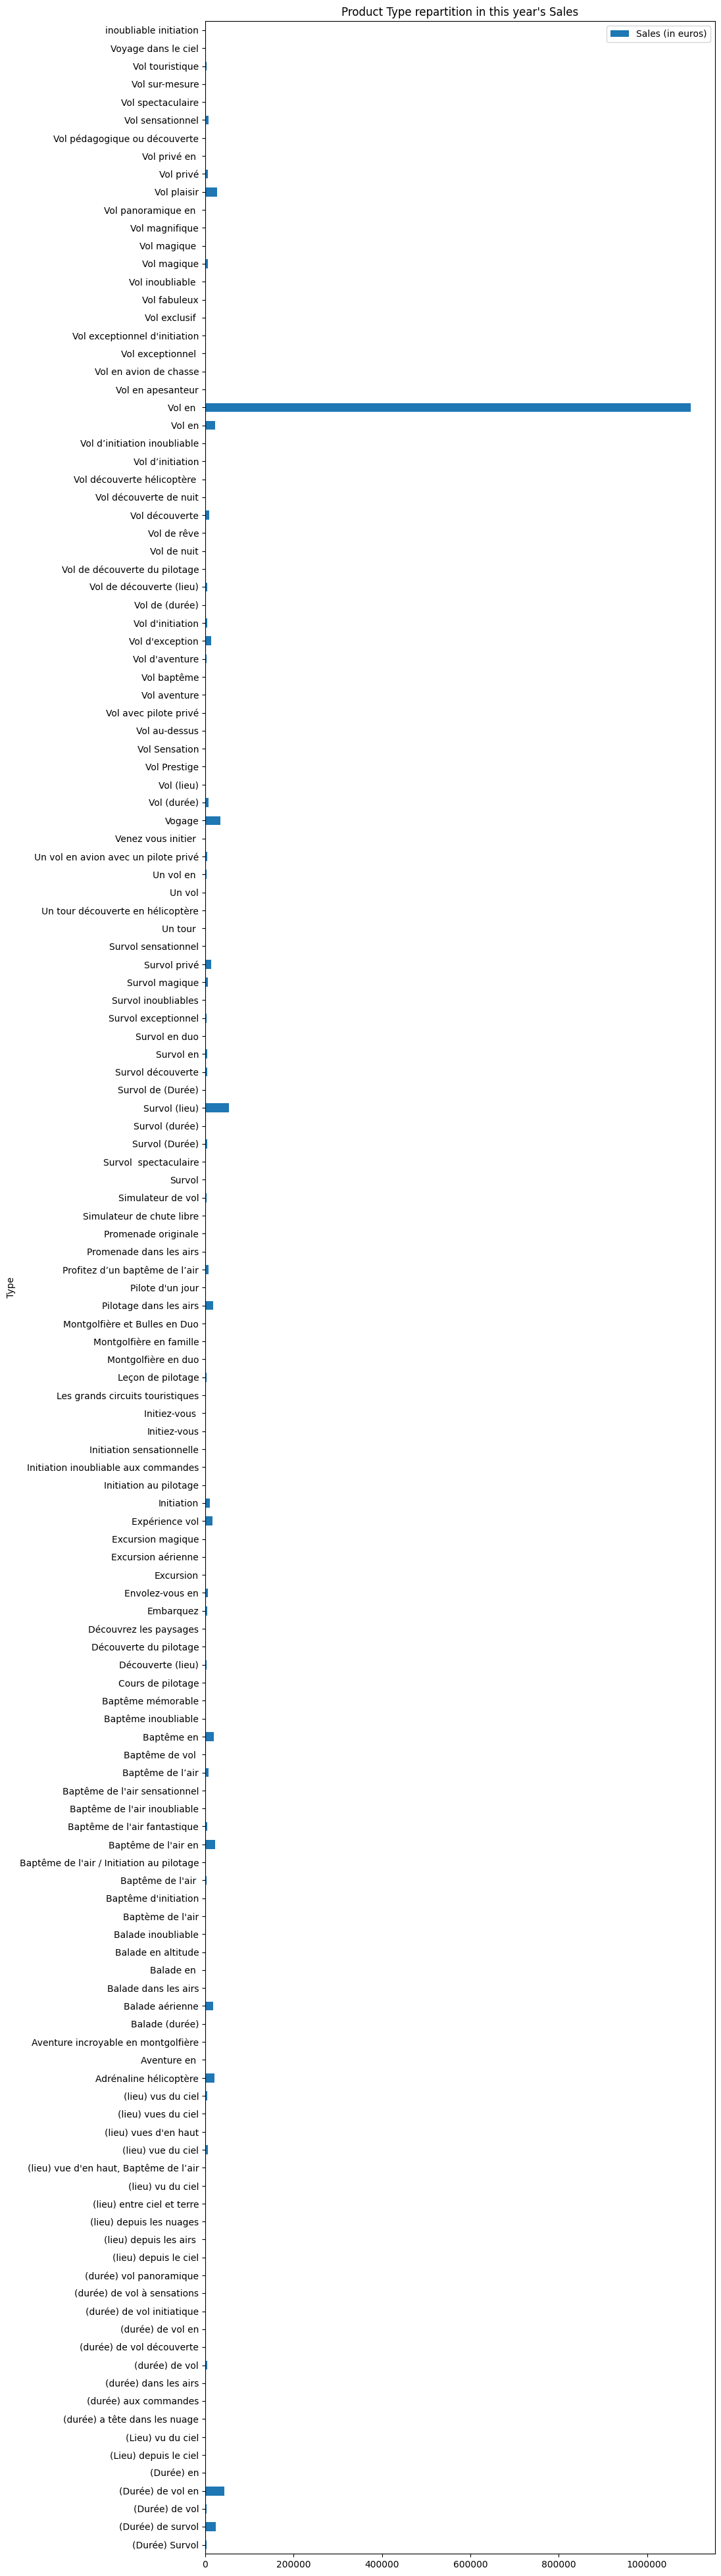

In [576]:
print(f'Total sales this year: {total_sales} euros')

display_serie_weight(serie=sales_by_product_type, total=total_sales)
plot_as_barh(serie=sales_by_product_type, barh_title=f"Product Type repartition in this year's Sales")

## Best Sellers by Sales by Region

In [577]:
for region in data["Region"].unique():
    sold = data.loc[data["Region"] == region].loc[:, ~data.columns.isin(["Conversion Rate", "Conversion Rate Last Year"])]
    print(f"\n10 Produits les mieux vendus dans la région {region}:")
    display(sold.sort_values(by="Sales", ascending=False)[:10])


10 Produits les mieux vendus dans la région Centre-Val-De-Loire:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
342,Hot air balloon,1270458.0,Vol en montgolfière avec dégustation et visite...,Vol en,"dégustation, cave",Centre-Val-De-Loire,Ambroise,NaN,389.9,218344.00,13500.0,560.0,67907.58,6566.0,174.0
318,Hot air balloon,1458497.0,Vol en montgolfière d'1h au-dessus des château...,Vol en,<NA>,Centre-Val-De-Loire,Château de la loire,60.0,289.9,113302.58,8388.0,391.0,0.00,0.0,0.0
319,Hot air balloon,1458485.0,Vol en montgolfière d'1h en duo au-dessus des ...,Vol en,"Semaine,week-end",Centre-Val-De-Loire,Château de la loire,60.0,359.9,63822.27,3829.0,177.0,0.00,0.0,0.0
320,Hot air balloon,1458491.0,Vol en montgolfière d'1h20 au-dessus des châte...,Vol en,"Semaine,week-end",Centre-Val-De-Loire,Château de la loire,80.0,149.9,57536.62,8550.0,384.0,0.00,0.0,0.0
321,Hot air balloon,1458493.0,Vol en montgolfière d'1h20 le matin en semaine...,Vol en,Matin en semaine,Centre-Val-De-Loire,Château de la loire,80.0,139.9,24645.72,4725.0,176.0,0.00,0.0,0.0
301,Hot air balloon,1457252.0,Vol d'exception en montgolfière au-dessus du c...,Vol d'exception,<NA>,Centre-Val-De-Loire,Chenonceau,NaN,419.9,14206.62,1238.0,34.0,8048.08,2056.0,19.0
317,Hot air balloon,1511608.0,Vol en montgolfière d'1h à Chenonceaux,Vol en,<NA>,Centre-Val-De-Loire,Chenonceaux,60.0,214.9,9276.52,3319.0,43.0,0.00,0.0,0.0
259,Helicopter,1411935.0,Baptême de l'air en hélicoptère en duo en Indr...,Baptême de l'air en,<NA>,Centre-Val-De-Loire,Indre-et-Loire,NaN,77.9,8270.38,10990.0,106.0,2207.17,2015.0,28.0
299,Hot air balloon,1270456.0,Vol en montgolfière depuis Amboise avec visite...,Vol en,"dégustation, cave",Centre-Val-De-Loire,Amboise / Touraine,NaN,199.9,7462.93,3106.0,37.0,4664.33,3265.0,23.0
254,Helicopter,1358326.0,Baptême de l'air en hélicoptère en duo dans la...,Baptême de l'air en,<NA>,Centre-Val-De-Loire,Château de la loire,NaN,164.9,5386.73,1541.0,33.0,2198.67,953.0,13.0



10 Produits les mieux vendus dans la région Normandie:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
45,ULM/Plane,1456446.0,Survol privé d'1h30 du mont Saint-Michel et de...,Survol privé,privé,Normandie,Mont Saint-Michel,90.0,264.9,11434.85,944.0,43.0,3752.75,664.0,14.0
421,ULM/Plane,2441.0,ENVOLEZ-VOUS EN ULM AU-DESSUS DU MONT SAINT-MI...,Envolez-vous en,<NA>,Normandie,Mont Saint-Michel,NaN,49.9,6054.53,2141.0,121.0,5364.25,2079.0,108.0
262,Helicopter,1431611.0,Balade de 20 min en hélicoptère au-dessus de ...,Balade aérienne,<NA>,Normandie,la baie du Mont-Saint-Michel,20.0,129.9,5304.25,1545.0,41.0,216.50,216.0,2.0
471,ULM/Plane,1411192.0,Vol en ULM palpitant durant 45 minutes au-dess...,Vol en,<NA>,Normandie,Étretat,45.0,199.9,4897.55,296.0,25.0,1499.25,170.0,8.0
95,Helicopter,1456445.0,Balade aérienne privée des plages du débarquement,Balade aérienne,privé,Normandie,plages du débarquement,NaN,149.9,3672.55,645.0,25.0,4247.17,703.0,28.0
217,Helicopter,1503569.0,Survol de 10 minutes à 2 du Mont-Saint-Michel ...,Survol (Durée),<NA>,Normandie,Mont-Saint-Michel,10.0,184.9,1725.73,168.0,9.0,0.00,0.0,0.0
470,ULM/Plane,1411193.0,Survol des falaises de la Côte d’Albâtre en UL...,Survol (lieu),<NA>,Normandie,Côte d’Albâtre,NaN,99.9,1282.05,800.0,13.0,416.25,236.0,4.0
430,ULM/Plane,1411199.0,Vol en ULM au-dessus des falaises de la Côte d...,Vol en,<NA>,Normandie,Côte d’Albâtre,NaN,89.9,734.18,520.0,8.0,374.58,496.0,4.0
473,ULM/Plane,1411200.0,Survol inoubliable des hameaux de la côte norm...,Survol inoubliables,<NA>,Normandie,côte normande,NaN,139.9,652.87,245.0,5.0,116.58,99.0,1.0
218,Helicopter,1503570.0,Survol de 25 minutes à 2 du Mont-Saint-Michel ...,Survol (Durée),<NA>,Normandie,Mont-Saint-Michel,25.0,497.9,580.88,50.0,1.0,0.00,0.0,0.0



10 Produits les mieux vendus dans la région Occitanie:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
338,Hot air balloon,1358574.0,Expérience vol en montgolfière et dégustation ...,Expérience vol,dégustation,Occitanie,Cerdagne,NaN,489.9,16574.95,1181.0,34.0,6123.75,1206.0,13.0
427,ULM/Plane,1385294.0,Baptême de l’air en ULM de 30 minutes sur le c...,Baptême de l'air,<NA>,Occitanie,Pont du Gard/ Gorges du Gardon,30.0,99.9,2797.20,495.0,28.0,1581.75,419.0,16.0
178,Helicopter,1456448.0,Balade aérienne d'1h pour 2 à la découverte de...,Balade aérienne,<NA>,Occitanie,Toulouse,60.0,179.9,1679.07,578.0,9.0,1199.33,276.0,7.0
227,Helicopter,1467650.0,Balade aérienne de 45 min sur la côte méditerr...,Balade aérienne,<NA>,Occitanie,Côte d'Améthyste,45.0,179.9,1049.42,120.0,6.0,0.00,0.0,0.0
232,Helicopter,1459700.0,Survol privé au-dessus des Pyrénées et des Gor...,Survol privé,privé,Occitanie,Pyrénées - Gorges de l’Aveyron,NaN,219.9,1026.20,123.0,5.0,0.00,0.0,0.0
331,Hot air balloon,1505190.0,Montgolfière en duo : 1h15 de vol au-dessus de...,Montgolfière en duo,<NA>,Occitanie,Pyrénées,75.0,374.9,874.77,49.0,2.0,0.00,0.0,0.0
228,Helicopter,1461213.0,Région toulousaine vue du ciel : balade aérien...,(lieu) vue du ciel,privé,Occitanie,Toulouse,60.0,216.9,506.10,194.0,2.0,0.00,0.0,0.0
374,ULM/Plane,2008.0,SURVOLEZ LE PONT DU GARD EN ULM,Survol (lieu),<NA>,Occitanie,Guard,NaN,49.9,465.73,241.0,9.0,790.08,325.0,16.0
329,Hot air balloon,1505189.0,1h15 de vol en montgolfière au-dessus des Pyré...,(Durée) de vol en,<NA>,Occitanie,Pyrénées,75.0,184.9,431.43,209.0,2.0,0.00,0.0,0.0
233,Helicopter,1505125.0,Toulouse vue du ciel : 15 min de vol panoramiq...,(lieu) vue du ciel,<NA>,Occitanie,Toulouse,15.0,129.9,303.10,40.0,2.0,0.00,0.0,0.0



10 Produits les mieux vendus dans la région PACA:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
44,ULM/Plane,590538.0,Leçon de pilotage aux commandes d'un avion de ...,Leçon de pilotage,<NA>,PACA,Bouches-du-Rhône,NaN,142.0,2485.00,618.0,18.0,828.33,540.0,6.0
16,ULM/Plane,1456443.0,Vol privé d'1h au-dessus de la Côte d’Azur pou...,Vol privé,privé,PACA,Côte d'Asuz,60.0,215.9,2015.07,303.0,9.0,2338.92,471.0,11.0
243,Helicopter,1508911.0,Marseille et ses environs vus du ciel : 20 min...,(lieu) vus du ciel,<NA>,PACA,Marseille,20.0,359.9,1679.53,177.0,5.0,0.00,0.0,0.0
36,ULM/Plane,1461180.0,Côte d'Azur vue du ciel : 1h de balade en avio...,(lieu) vue du ciel,privé,PACA,Côte d'Azur,60.0,258.9,1208.20,269.0,5.0,0.00,0.0,0.0
242,Helicopter,1488244.0,Survol en hélicoptère de Marseille et ses envi...,Survol en,<NA>,PACA,Marseille,20.0,184.9,862.87,236.0,5.0,0.00,0.0,0.0
240,Helicopter,1488243.0,Promenade dans les airs au départ de Hyères : ...,Promenade dans les airs,<NA>,PACA,Hyères,20.0,184.9,862.87,80.0,5.0,0.00,0.0,0.0
429,ULM/Plane,1279125.0,Survol de presque 1h des monts de Vaucluse en ...,Survol (durée),<NA>,PACA,Vaucluse,60.0,148.9,694.87,85.0,5.0,372.25,137.0,3.0
426,ULM/Plane,1279121.0,Baptême de l'air en ULM avec instructeur en Pr...,Baptême de l'air en,<NA>,PACA,Provence,NaN,98.9,576.92,236.0,6.0,329.67,409.0,3.0
239,Helicopter,1459701.0,Côte d'Azur vue du ciel : balade aérienne priv...,(lieu) vue du ciel,privé,PACA,Côte d'Azur,60.0,242.9,566.77,105.0,2.0,0.00,0.0,0.0
472,ULM/Plane,1279122.0,Survol en ULM du Pays des Sorgues et vidéo du vol,Survol,<NA>,PACA,Sorgues,NaN,128.9,451.15,76.0,4.0,107.42,79.0,1.0



10 Produits les mieux vendus dans la région Paris & Île-de-France:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
176,Helicopter,1342613.0,Vol découverte de Paris et du château de Versa...,Vol découverte,<NA>,Paris & Île-de-France,Paris / château de Versailles,25.0,419.9,7348.25,573.0,18.0,5598.67,615.0,13.0
475,ULM/Plane,1385292.0,Baptême de l'air fantastique en ULM sur le cir...,Baptême de l'air fantastique,<NA>,Paris & Île-de-France,Paris,NaN,79.9,5220.13,1415.0,65.0,665.83,319.0,8.0
465,ULM/Plane,1268708.0,Baptême de l'air en ULM pendulaire ou multiaxe...,Baptême de l'air en,<NA>,Paris & Île-de-France,Paris,NaN,89.9,4824.63,806.0,54.0,1872.92,612.0,21.0
253,Helicopter,1474220.0,Vol en hélicoptère autour du château de Versai...,Vol de découverte (lieu),<NA>,Paris & Île-de-France,château de Versailles/Yvelines,NaN,399.9,4665.50,424.0,12.0,1999.50,374.0,5.0
302,Hot air balloon,1650.0,EMBARQUEZ À 2 DANS LE BALLON GENERALI AU-DESSU...,Embarquez,<NA>,Paris & Île-de-France,Paris,NaN,29.9,3941.82,2884.0,132.0,2043.17,1546.0,68.0
185,Helicopter,1342601.0,Vol de 25 min en hélicoptère au-dessus de l’ou...,Vol (durée),<NA>,Paris & Île-de-France,Paris/château de Versailles,25.0,219.9,2822.05,438.0,13.0,1466.00,764.0,7.0
477,ULM/Plane,590508.0,"30 minutes de vol en ULM pour 2 personnes, au-...",(Durée) de vol en,<NA>,Paris & Île-de-France,Seine-et-Marne,30.0,196.0,2286.67,192.0,12.0,163.33,108.0,1.0
461,ULM/Plane,1447004.0,Vol d'initiation au pilotage d'un ULM pendant ...,Vol d'initiation,<NA>,Paris & Île-de-France,Paris,45.0,184.9,2157.17,213.0,12.0,0.00,0.0,0.0
476,ULM/Plane,1268706.0,Vol en ULM dans les environs de Meaux et Disne...,Vol en,<NA>,Paris & Île-de-France,Disneyland,NaN,179.9,1679.07,342.0,9.0,149.92,458.0,1.0
457,ULM/Plane,1443427.0,Baptême de l'air en ULM : 30 min de vol au-des...,Baptême de l'air en,<NA>,Paris & Île-de-France,Paris,30.0,99.9,1631.70,337.0,16.0,0.00,0.0,0.0



10 Produits les mieux vendus dans la région Pays-De-La-Loire:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
464,ULM/Plane,1400123.0,Vol sensationnel en ULM au-dessus des paysages...,Vol sensationnel,<NA>,Pays-De-La-Loire,Anjou,NaN,149.9,1399.07,185.0,9.0,0.00,121.0,0.0
248,Helicopter,1505130.0,Survol de 25 minutes de La Baule et ses enviro...,Survol (Durée),<NA>,Pays-De-La-Loire,La Baule,25.0,184.9,647.15,42.0,4.0,0.00,0.0,0.0
467,ULM/Plane,1400124.0,Vol d'initiation en ULM pour découvrir Angers ...,Vol d'initiation,<NA>,Pays-De-La-Loire,Angers,45.0,129.9,606.20,160.0,5.0,216.50,111.0,2.0
336,Hot air balloon,1457248.0,Survol de la Sarthe en montgolfière pour un duo,Survol (lieu),<NA>,Pays-De-La-Loire,Sarthe,NaN,449.9,524.88,154.0,1.0,0.00,0.0,0.0
463,ULM/Plane,1478261.0,Vol de 20 min en ULM VL-3 à la découverte de C...,Vol (durée),<NA>,Pays-De-La-Loire,Cholet,20.0,59.9,489.18,147.0,8.0,0.00,0.0,0.0
249,Helicopter,1505150.0,Survol des Sables-d’Olonne et ses environs en ...,Survol (lieu),<NA>,Pays-De-La-Loire,Sables-d’Olonne,NaN,279.9,326.55,8.0,1.0,0.00,0.0,0.0
246,Helicopter,1461217.0,Balade aérienne privée d'1h aux alentours du M...,Balade aérienne,privé,Pays-De-La-Loire,Mans,60.0,216.9,253.05,52.0,1.0,0.00,0.0,0.0
247,Helicopter,1505137.0,Le Mans et ses environs depuis les nuages : 25...,(lieu) depuis les nuages,<NA>,Pays-De-La-Loire,Mans,25.0,209.9,244.88,16.0,1.0,0.00,0.0,0.0
38,ULM/Plane,1461216.0,Le Mans et ses alentours vus du ciel : survol ...,(lieu) vus du ciel,<NA>,Pays-De-La-Loire,Mans,60.0,174.9,204.05,82.0,1.0,0.00,0.0,0.0
268,Hot air balloon,1457247.0,Aventure incroyable en montgolfière au-dessus ...,Aventure incroyable en montgolfière,<NA>,Pays-De-La-Loire,Sarthe,NaN,229.9,0.00,383.0,0.0,383.17,111.0,2.0



10 Produits les mieux vendus dans la région Hauts-de-France:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
43,ULM/Plane,1397526.0,Initiation au pilotage d'avion lors d'1 vol dé...,Initiation,<NA>,Hauts-de-France,Lille,NaN,99.9,6993.00,1793.0,70.0,2331.00,908.0,23.0
41,ULM/Plane,558031.0,Profitez d’un baptême de l’air en avion au-des...,Profitez d’un baptême de l’air,<NA>,Hauts-de-France,Côte d’Opale,NaN,59.0,6952.17,3123.0,118.0,2556.67,1516.0,43.0
42,ULM/Plane,558029.0,Baptême de l’air en avion au-dessus du littora...,Baptême de l’air,<NA>,Hauts-de-France,Côte d’Opale,20.0,49.5,5024.25,1694.0,102.0,1815.00,875.0,37.0
39,ULM/Plane,1382011.0,Survol de 45 minutes en avion du Grand Site de...,Survol de (Durée),<NA>,Hauts-de-France,Grand Site de France des Deux-Caps,45.0,269.9,944.65,82.0,4.0,449.83,606.0,2.0
437,ULM/Plane,1489592.0,Baptême de l’air en ULM Gyrocoptère : 30 min d...,Baptême de l'air,<NA>,Hauts-de-France,Lille,30.0,129.9,606.20,132.0,5.0,0.00,0.0,0.0
26,ULM/Plane,1382008.0,Vol avec pilote privé au-dessus de la Côte d’O...,Vol avec pilote privé,privé,Hauts-de-France,Côte d’Opale,NaN,79.9,559.30,280.0,7.0,332.92,216.0,4.0
324,Hot air balloon,1473293.0,Vol en montgolfière d'1h30 en duo dans le ciel...,Vol en,<NA>,Hauts-de-France,Somme,90.0,399.9,466.55,59.0,1.0,0.00,0.0,0.0
30,ULM/Plane,1467720.0,45 min de vol en avion au-dessus de la Côte d'...,(Durée) de vol,<NA>,Hauts-de-France,Côte d'Opale,45.0,179.9,419.77,119.0,2.0,0.00,0.0,0.0
15,ULM/Plane,1382010.0,45 minutes de vol avec pilote privé au-dessus ...,(Durée) de vol,privé,Hauts-de-France,Côte d’Opale,45.0,179.9,209.88,331.0,1.0,449.75,128.0,3.0
20,ULM/Plane,1397528.0,Vol découverte de nuit en avion pendant 25 min...,Vol découverte de nuit,nuit,Hauts-de-France,Valenciennes,25.0,199.9,0.00,27.0,0.0,0.00,62.0,0.0



10 Produits les mieux vendus dans la région Bourgogne-Franche-Comté:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
312,Hot air balloon,1458482.0,1h de vol en montgolfière le matin en semaine ...,(Durée) de vol en,"Semaine, matin",Bourgogne-Franche-Comté,Bourgogne,60.0,289.9,12514.02,1122.0,43.0,0.00,0.0,0.0
315,Hot air balloon,1458487.0,Vol plaisir en montgolfière en duo pendant 1h ...,Vol plaisir,"Semaine,week-end",Bourgogne-Franche-Comté,Bourgogne,60.0,359.9,9237.43,1012.0,26.0,0.00,0.0,0.0
313,Hot air balloon,1457729.0,"Vol en montgolfière d'1h20 en Bourgogne, en se...",Vol en,"Semaine,week-end",Bourgogne-Franche-Comté,Bourgogne,80.0,149.9,8219.52,1233.0,55.0,0.00,0.0,0.0
314,Hot air balloon,1457728.0,Vol en montgolfière d'1h20 le matin en semaine...,Vol en,"Semaine, matin",Bourgogne-Franche-Comté,Bourgogne,80.0,139.9,6365.45,1758.0,46.0,0.00,0.0,0.0
468,ULM/Plane,1396413.0,Vol en ULM pendulaire en Bourgogne,Vol en,<NA>,Bourgogne-Franche-Comté,Bourgogne,NaN,99.9,932.40,281.0,9.0,333.00,237.0,3.0
256,Helicopter,1474231.0,Les côtes chalonnaises depuis le ciel : vol ma...,(lieu) depuis le ciel,<NA>,Bourgogne-Franche-Comté,Les côtes chalonnaises,NaN,259.9,606.43,94.0,2.0,216.58,68.0,1.0
28,ULM/Plane,1461215.0,Balade d’1h en avion privé pour 3 à Besançon e...,Balade (durée),privé,Bourgogne-Franche-Comté,Besançon,60.0,234.9,548.10,78.0,2.0,0.00,0.0,0.0
201,Helicopter,1461214.0,Survol privé au-dessus de Besançon et ses alen...,Survol privé,privé,Bourgogne-Franche-Comté,Besançon,NaN,192.9,450.10,61.0,2.0,0.00,0.0,0.0
255,Helicopter,1462144.0,Survol inoubliable des vignobles des Côtes cha...,Survol inoubliables,vignobles,Bourgogne-Franche-Comté,Côtes chalonnaises,NaN,144.9,338.10,61.0,2.0,120.75,86.0,1.0
250,Helicopter,1462143.0,Vol magnifique en hélicoptère au-dessus de Cha...,Vol magnifique,<NA>,Bourgogne-Franche-Comté,Chalon-sur-Saône,NaN,89.9,314.65,260.0,4.0,149.83,458.0,2.0



10 Produits les mieux vendus dans la région Corse:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
18,ULM/Plane,1508157.0,Bastia vue d’en haut : baptême de l’air de 25 ...,"(lieu) vue d'en haut, Baptême de l’air",<NA>,Corse,Bastia,25.0,199.9,0.0,29.0,0.0,0.0,0.0,0.0



10 Produits les mieux vendus dans la région Grand-Est:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
323,Hot air balloon,1483695.0,1h de vol en mongoflière pour 2 avec coupe de ...,(Durée) de vol en,champagne,Grand-Est,Reims,60.0,389.9,13191.62,867.0,34.0,0.0,0.0,0.0
215,Helicopter,1467659.0,Strasbourg vue du ciel : survol d'1h pour 2 pe...,(lieu) vue du ciel,<NA>,Grand-Est,Strasbourg,60.0,159.9,2798.25,436.0,18.0,0.0,0.0,0.0
322,Hot air balloon,1483694.0,1h de vol en mongoflière avec coupe de champag...,(Durée) de vol en,champagne,Grand-Est,Reims,60.0,219.9,1539.30,259.0,7.0,0.0,0.0,0.0
216,Helicopter,1483675.0,Survol en hélicoptère de Colmar pendant 20 min,Survol en,<NA>,Grand-Est,Colmar,20.0,184.9,862.87,243.0,5.0,0.0,0.0,0.0
436,ULM/Plane,1491435.0,30 min de vol panoramique en ULM près de Colmar,(durée) vol panoramique,<NA>,Grand-Est,Colmar,30.0,124.9,145.72,38.0,1.0,0.0,0.0,0.0
391,ULM/Plane,1491439.0,50 min de vol panoramique en ULM pour 2 près d...,(durée) vol panoramique,<NA>,Grand-Est,Colmar,50.0,379.9,0.00,11.0,0.0,0.0,0.0,0.0
395,ULM/Plane,1496236.0,Vol de 40 minutes en ULM multiaxes entre Nancy...,Vol (durée),<NA>,Grand-Est,Nancy / Strasbourg,40.0,154.9,0.00,18.0,0.0,0.0,0.0,0.0
394,ULM/Plane,1496235.0,Vol de 30 minutes en ULM multiaxes entre Nancy...,Vol (durée),<NA>,Grand-Est,Nancy / Strasbourg,30.0,124.9,0.00,19.0,0.0,0.0,0.0,0.0
393,ULM/Plane,1491438.0,Initiation au pilotage d'un ULM pendant 50 min...,Initiation au pilotage,<NA>,Grand-Est,Colmar,50.0,279.9,0.00,18.0,0.0,0.0,0.0,0.0
392,ULM/Plane,1491436.0,50 min de vol panoramique en ULM près de Colmar,(durée) vol panoramique,<NA>,Grand-Est,Colmar,50.0,184.9,0.00,14.0,0.0,0.0,0.0,0.0



10 Produits les mieux vendus dans la région Nouvelle-Aquitaine:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
25,ULM/Plane,1456447.0,Balade aérienne privée d'1h pour 2 au-dessus d...,Balade aérienne,privé,Nouvelle-Aquitaine,Arcachon,60.0,179.9,4617.43,582.0,26.0,3598.00,606.0,20.0
91,Helicopter,1474227.0,Survol magique en hélicoptère du bassin d’Arca...,Survol magique,<NA>,Nouvelle-Aquitaine,bassin d’Arcachon,NaN,264.9,3090.50,341.0,12.0,5518.75,891.0,21.0
184,Helicopter,1462142.0,Vol touristique de 30 minutes en hélicoptère a...,Vol touristique,<NA>,Nouvelle-Aquitaine,Arcachon,30.0,219.9,2822.05,241.0,13.0,1466.00,271.0,7.0
261,Helicopter,1474232.0,Survol découverte du fort Boyard et du phare d...,Survol découverte,<NA>,Nouvelle-Aquitaine,Fort Boyard / phare de Chassiron,NaN,399.9,2799.30,260.0,7.0,666.50,130.0,2.0
328,Hot air balloon,1461330.0,Vol en montgolfière d’1h près de Bordeaux avec...,Vol en,"dégustation, cave",Nouvelle-Aquitaine,Bordeaux,NaN,529.9,2472.87,540.0,5.0,0.00,0.0,0.0
252,Helicopter,1462141.0,Vol en hélicoptère inoubliable autour du bassi...,Vol en,<NA>,Nouvelle-Aquitaine,Arcachon,NaN,144.9,2366.70,303.0,16.0,1086.75,439.0,8.0
223,Helicopter,1474229.0,Survol du fort Boyard en hélicoptère pour 2,Survol (lieu),<NA>,Nouvelle-Aquitaine,Fort Boyard,NaN,157.9,2210.60,353.0,14.0,0.00,482.0,0.0
340,Hot air balloon,1520352.0,Vol en montgolfière de 2h à 2 au lever du sole...,Vol en,"Matin, dégustation",Nouvelle-Aquitaine,Périgueux,NaN,899.9,2099.77,329.0,2.0,749.92,304.0,1.0
90,Helicopter,1474225.0,Survol en hélicoptère autour du bassin d’Arcac...,Survol en,<NA>,Nouvelle-Aquitaine,bassin d’Arcachon,NaN,399.9,1866.20,128.0,5.0,3665.75,266.0,9.0
225,Helicopter,1467665.0,Vol de 10 minutes en hélicoptère au-dessus du ...,Vol (durée),<NA>,Nouvelle-Aquitaine,Arcachon,10.0,79.9,1771.12,529.0,22.0,0.00,0.0,0.0



10 Produits les mieux vendus dans la région Auvergne-Rhône-Alpes:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
177,Helicopter,1474236.0,Survol du mont Blanc en hélicoptère pendant 20...,Survol (lieu),Depuis Megève,Auvergne-Rhône-Alpes,Mont-Blanc,20.0,159.9,22386.00,5251.0,140.0,15990.00,4505.0,100.0
304,Hot air balloon,1457726.0,Vol en montgolfière d'1h en duo proche de l'Au...,Vol en,"Semaine,week-end",Auvergne-Rhône-Alpes,Auvergne,60.0,379.9,19501.53,2058.0,51.0,0.00,0.0,0.0
101,Helicopter,1474214.0,20 minutes de survol du mont Blanc en hélicopt...,(Durée) de survol,<NA>,Auvergne-Rhône-Alpes,Mont-Blanc,20.0,299.9,12245.92,1216.0,41.0,12995.67,1200.0,43.0
87,Helicopter,1474219.0,30 minutes de survol du mont Blanc en hélicopt...,(Durée) de survol,<NA>,Auvergne-Rhône-Alpes,Mont-Blanc,30.0,399.9,9331.00,537.0,23.0,21994.50,1071.0,55.0
193,Helicopter,1467664.0,Survol du mont Blanc de 20 min en hélicoptère,Survol (lieu),<NA>,Auvergne-Rhône-Alpes,Mont-Blanc,20.0,151.9,9038.05,1283.0,60.0,0.00,0.0,0.0
86,Helicopter,1474238.0,Survol du mont Blanc en hélicoptère pendant 30...,Survol (lieu),Depuis Megève,Auvergne-Rhône-Alpes,Mont-Blanc,30.0,219.9,8466.15,1111.0,39.0,22356.50,2454.0,102.0
305,Hot air balloon,1457722.0,Vol en montgolfière d'1h20 en semaine et le we...,Vol en,"Semaine,week-end",Auvergne-Rhône-Alpes,Auvergne,80.0,149.9,8219.52,1773.0,55.0,0.00,0.0,0.0
309,Hot air balloon,1457618.0,Vol plaisir en montgolfière d'1h pour 2 en sem...,Vol plaisir,"Semaine,week-end",Auvergne-Rhône-Alpes,Auvergne,60.0,359.9,7557.90,889.0,21.0,0.00,0.0,0.0
197,Helicopter,1467663.0,Vol en hélicoptère de 30 min autour du mont B...,Vol en,<NA>,Auvergne-Rhône-Alpes,Mont-Blanc,30.0,209.9,6122.08,830.0,29.0,0.00,0.0,0.0
172,Helicopter,1374894.0,20 minutes de vol en hélicoptère autour du Pic...,(durée) de vol,<NA>,Auvergne-Rhône-Alpes,Pic du Midi,20.0,269.9,5353.02,483.0,20.0,5173.08,752.0,19.0



10 Produits les mieux vendus dans la région Bretagne:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
29,ULM/Plane,1483705.0,20 min d'initiation au pilotage à bord d'un av...,Initiation,<NA>,Bretagne,Brest,20.0,99.9,1282.05,280.0,13.0,0.0,0.0,0.0
209,Helicopter,1503566.0,Vannes depuis les airs : 20 min de vol en héli...,(lieu) depuis les airs,<NA>,Bretagne,Bretagne/Vannes,20.0,328.9,1151.15,93.0,4.0,0.0,0.0,0.0
434,ULM/Plane,1488267.0,Survol de 35 min du golfe du Morbihan en ULM,Survol (durée),<NA>,Bretagne,Golfe du Morbihan,35.0,159.9,1119.30,121.0,7.0,0.0,0.0,0.0
206,Helicopter,1503567.0,Golfe du Morbihan depuis les airs : 30 min de ...,(lieu) depuis les airs,<NA>,Bretagne,Golfe du Morbihan,30.0,248.9,580.77,50.0,2.0,0.0,0.0,0.0
210,Helicopter,1505123.0,Vol en hélicoptère au-dessus de Quiberon et sa...,Vol en,<NA>,Bretagne,Quiberon et sa presqu'île,NaN,129.9,303.10,68.0,2.0,0.0,0.0,0.0
207,Helicopter,1505135.0,La Bretagne depuis les airs : 25 min de vol en...,(lieu) depuis les airs,<NA>,Bretagne,Bretagne,25.0,209.9,244.88,49.0,1.0,0.0,0.0,0.0
205,Helicopter,1505127.0,15 minutes la tête dans les nuages lors d'un v...,(durée) a tête dans les nuage,<NA>,Bretagne,Quimper,15.0,149.9,174.88,16.0,1.0,0.0,0.0,0.0
208,Helicopter,1505120.0,Promenade dans les airs au-dessus de la Bretag...,Promenade dans les airs,<NA>,Bretagne,Bretagne,15.0,129.9,151.55,40.0,1.0,0.0,0.0,0.0
384,ULM/Plane,1516661.0,Baptême de l'air en Bretagne : 45 min de vol e...,Baptême de l'air en,<NA>,Bretagne,Bréhat,45.0,159.9,0.00,4.0,0.0,0.0,0.0,0.0
383,ULM/Plane,1516660.0,Baptême de l'air en Bretagne : 30 min de vol e...,Baptême de l'air en,<NA>,Bretagne,Baie de Morlaix,30.0,239.9,0.00,3.0,0.0,0.0,0.0,0.0



10 Produits les mieux vendus dans la région Offre box France Entière:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
300,Hot air balloon,1257666.0,Vol en Montgolfière en France pour 1,Vol en,<NA>,Offre box France Entière,France entière,NaN,149.9,227698.10,56225.0,1519.0,130537.92,61171.0,871.0
298,Hot air balloon,1259281.0,Vol en Montgolfière en semaine pour 2,Vol en,Semaine,Offre box France Entière,France entière,NaN,289.9,167079.03,19928.0,576.0,113544.17,26616.0,392.0
341,Hot air balloon,1261451.0,Vol en montgolfière en semaine pour un,Vol en,Semaine,Offre box France Entière,France entière,NaN,139.9,57615.48,19927.0,412.0,19003.08,11504.0,136.0
296,Hot air balloon,1430446.0,Vol en montgolfière magique en semaine et le w...,Vol en,"Semaine,week-end",Offre box France Entière,France entière,NaN,359.9,38629.27,4998.0,107.0,35990.00,17725.0,100.0
272,Hot air balloon,1489045.0,VOYAGE EN MONTGOLFIÈRE,Vogage,<NA>,Offre box France Entière,France entière,NaN,199.9,34982.50,6247.0,175.0,38480.75,9982.0,193.0
269,Hot air balloon,1489046.0,Vol en montgolfière pour 2,Vol en,<NA>,Offre box France Entière,France entière,NaN,399.9,31725.40,2404.0,79.0,56319.25,11099.0,141.0
175,Helicopter,1127861.0,Adrénaline hélicoptère,Adrénaline hélicoptère,<NA>,Offre box France Entière,France entière,NaN,189.9,20382.60,8062.0,107.0,17091.00,10251.0,90.0
377,ULM/Plane,2060.0,BAPTÊME EN ULM,Baptême en,<NA>,Offre box France Entière,France entière,NaN,49.9,18454.68,6742.0,370.0,21872.83,13124.0,438.0
46,ULM/Plane,1131370.0,Pilotage dans les airs,Pilotage dans les airs,<NA>,Offre box France Entière,France entière,NaN,189.9,17724.00,3499.0,93.0,5380.50,1870.0,28.0
258,Helicopter,1123938.0,Vol en hélicoptère pour 2,Vol en,<NA>,Offre box France Entière,France entière,NaN,379.9,11966.85,1733.0,32.0,3482.42,1166.0,9.0



10 Produits les mieux vendus dans la région Offre en dehors France:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
64,Fighter aircraft,1409989.0,Avontuurlijke vlucht in een MB-326 gevechtsvli...,Vol d'aventure,<NA>,Offre en dehors France,Italie,NaN,2509.9,2928.22,168.0,1.0,0.00,86.0,0.0
335,Hot air balloon,1464747.0,Vol de nuit en montgolfière autour du lac Léman,Vol de nuit,nuit,Offre en dehors France,Suisse - lac Léman,NaN,479.9,1119.77,228.0,2.0,0.00,0.0,0.0
47,Fighter aircraft,1443478.0,Vol de 20 minutes à bord d'un avion de chasse ...,Vol de (durée),<NA>,Offre en dehors France,Slovaquie,20.0,1932.1,0.00,194.0,0.0,1610.08,400.0,1.0
58,Fighter aircraft,1410000.0,20-minütiger Flug mit einem L-39 Albatros-Kamp...,Vol de (durée),PASSER LES TEXTES FRANCAIS,Offre en dehors France,République tchèque,20.0,2007.9,0.00,130.0,0.0,0.00,383.0,0.0
294,Hot air balloon,1137343.0,Vol en mongolfière en Catalogne,Vol en,<NA>,Offre en dehors France,Espagne Catalogne,NaN,249.9,0.00,0.0,0.0,0.00,532.0,0.0
156,Helicopter,1342123.0,Survol de Lisbonne en hélicoptère pour 2 perso...,Survol (lieu),<NA>,Offre en dehors France,Portugal-Lisbonne,NaN,419.9,0.00,31.0,0.0,0.00,77.0,0.0
62,Fighter aircraft,1409985.0,Exclusieve vlucht boven de Zwitserse Alpen in ...,Vol exclusif,<NA>,Offre en dehors France,Suisse - Alpes suisses,NaN,7531.9,0.00,646.0,0.0,0.00,433.0,0.0
61,Fighter aircraft,1409995.0,Droomvlucht in een L-29 Delfín in Slowakije | ...,Vol de rêve,<NA>,Offre en dehors France,Slovaquie,NaN,2007.9,0.00,79.0,0.0,0.00,156.0,0.0
60,Fighter aircraft,1409997.0,Pilote d’1 jour en République tchèque : vol de...,Pilote d'un jour,OPTIMISATION CONTENUE,Offre en dehors France,République tchèque,20.0,3010.9,0.00,127.0,0.0,0.00,159.0,0.0
59,Fighter aircraft,1409994.0,Onvergetelijke vlucht in een L-39 Albatros in ...,Vol inoubliable,PASSER LES TEXTES FRANCAIS,Offre en dehors France,République Tchèque,NaN,2961.9,0.00,125.0,0.0,0.00,167.0,0.0



10 Produits les mieux vendus dans la région <NA>:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year


## Worst Sellers by Sales by Region

In [578]:
for region in data["Region"].unique():
    sold = data.loc[data["Region"] == region].loc[:, ~data.columns.isin(["Conversion Rate", "Conversion Rate Last Year"])]
    print(f"\n20 Produits les moins bien vendus dans la région {region}:")
    display(sold.sort_values(by="Sales", ascending=True)[:20])


20 Produits les moins bien vendus dans la région Centre-Val-De-Loire:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
0,ULM/Plane,1265193.0,Excursion au dessus des Châteaux de la Loire e...,Excursion,privé,Centre-Val-De-Loire,Château de la loire,NaN,372.9,0.0,0.0,0.0,310.75,150.0,1.0
274,Hot air balloon,1270460.0,Vol en montgolfière en famille au cœur de la T...,Vol en,"dégustation, cave",Centre-Val-De-Loire,Touraine,NaN,518.9,0.0,0.0,0.0,0.00,670.0,0.0
385,ULM/Plane,590923.0,Envolez-vous en ULM au-dessus du Val-de-Loire ...,Envolez-vous en,<NA>,Centre-Val-De-Loire,Val-de-Loire,70.0,147.0,0.0,4.0,0.0,0.00,787.0,0.0
127,Helicopter,1411930.0,Vol panoramique en hélicoptère en duo au-dessu...,Vol panoramique en,<NA>,Centre-Val-De-Loire,château d’Amboise,NaN,299.9,0.0,0.0,0.0,0.00,216.0,0.0
126,Helicopter,1412493.0,Vol exceptionnel en hélicoptère au-dessus du c...,Vol exceptionnel,<NA>,Centre-Val-De-Loire,château de Chambord,60.0,379.9,0.0,0.0,0.0,0.00,362.0,0.0
125,Helicopter,1505133.0,Vol en hélicoptère de 25 min au-dessus des châ...,Vol en,<NA>,Centre-Val-De-Loire,Château de la loire,25.0,209.9,0.0,25.0,0.0,0.00,0.0,0.0
124,Helicopter,1509080.0,Survol en hélicoptère des châteaux de la Loire,Survol en,<NA>,Centre-Val-De-Loire,Château de la loire,NaN,109.9,0.0,29.0,0.0,0.00,0.0,0.0
123,Helicopter,1412504.0,Initiation sensationnelle au pilotage d'un hél...,Initiation sensationnelle,<NA>,Centre-Val-De-Loire,Touraine,NaN,409.9,0.0,0.0,0.0,0.00,175.0,0.0
273,Hot air balloon,1351893.0,Vol en montgolfière d'1h en Touraine avec mome...,Vol en,dégustation,Centre-Val-De-Loire,Touraine,60.0,249.9,0.0,0.0,0.0,0.00,1508.0,0.0
386,ULM/Plane,1488266.0,Vol en ULM d’1h à la découverte des châteaux d...,Vol en,<NA>,Centre-Val-De-Loire,Touraine / Château de la loire,NaN,129.9,0.0,57.0,0.0,0.00,0.0,0.0



20 Produits les moins bien vendus dans la région Normandie:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
2,ULM/Plane,1403193.0,Balade aérienne privée à destination du mont S...,Balade aérienne,privé,Normandie,Mont Saint-Michel,NaN,324.9,0.00,0.0,0.0,812.25,93.0,3.0
401,ULM/Plane,1414108.0,Baptême de l'air de 35 minutes en Shark UL au-...,Baptême de l'air,<NA>,Normandie,Normandie,35.0,219.9,0.00,45.0,0.0,0.00,126.0,0.0
400,ULM/Plane,1414116.0,Baptême de l'air d'1h10 en Shark UL du Havre à...,Baptême de l'air,<NA>,Normandie,Havre,70.0,349.9,0.00,30.0,0.0,0.00,42.0,0.0
353,ULM/Plane,1344945.0,Baptême de l’air en Shark UL au-dessus des pla...,Baptême de l'air,<NA>,Normandie,plages du débarquement,NaN,279.9,0.00,132.0,0.0,233.25,176.0,1.0
352,ULM/Plane,1414114.0,Baptême de l’air de 35 minutes en Shark UL au-...,Baptême de l'air,<NA>,Normandie,plages du débarquement,35.0,219.9,0.00,68.0,0.0,183.25,71.0,1.0
351,ULM/Plane,1414129.0,Baptême de l'air d’1h15 en Shark UL du Havre j...,Baptême de l'air,<NA>,Normandie,Mont-Saint-Michel / havre,75.0,399.9,0.00,140.0,0.0,666.50,903.0,2.0
354,ULM/Plane,1405047.0,Vol découverte en ULM-hélicoptère au-dessus du...,Vol découverte,<NA>,Normandie,Mont Saint-Michel,NaN,119.9,0.00,0.0,0.0,399.67,334.0,3.0
131,Helicopter,1503565.0,Survol de 25 minutes du Havre et ses environs ...,Survol (Durée),<NA>,Normandie,Havre,25.0,209.9,0.00,37.0,0.0,0.00,0.0,0.0
4,ULM/Plane,1424697.0,Vol privé de 45 min au-dessus des Jardins d'Ét...,Vol privé,privé,Normandie,Étretat/Plages débarquement,45.0,179.9,0.00,19.0,0.0,4047.75,721.0,23.0
3,ULM/Plane,1321902.0,Survol des plages du débarquement pour 2 avec ...,Survol (lieu),privé,Normandie,Plages du débarquement,45.0,176.9,0.00,33.0,0.0,8107.92,1451.0,46.0



20 Produits les moins bien vendus dans la région Occitanie:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
5,ULM/Plane,1403107.0,Balade d’1h30 en avion à la découverte des Pyr...,Balade (durée),depuis Toulouse,Occitanie,Pyrénées - Toulouse,90.0,299.9,0.00,0.0,0.0,499.83,61.0,2.0
345,Free-fall simulator,1157077.0,4 vols en simulateur de chute libre pour 2 per...,Simulateur de chute libre,<NA>,Occitanie,Labège,NaN,299.9,0.00,0.0,0.0,0.00,15.0,0.0
357,ULM/Plane,1385305.0,Baptême de l'air inoubliable en autogire à Aig...,Baptême de l'air inoubliable,<NA>,Occitanie,Aigues-Mortes,NaN,179.9,0.00,80.0,0.0,299.83,92.0,2.0
358,ULM/Plane,590517.0,Vol en ULM pendulaire de 25 minutes dans les H...,Vol en,<NA>,Occitanie,Hautes-Pyrénées,25.0,87.0,0.00,0.0,0.0,435.00,196.0,5.0
411,ULM/Plane,1512582.0,Baptême de l’air en ULM trois axes de 30 min p...,Baptême de l'air,<NA>,Occitanie,Toulouse,30.0,87.9,0.00,5.0,0.0,0.00,0.0,0.0
412,ULM/Plane,1512584.0,Initiation au pilotage d’1h en ULM trois axes ...,Initiation au pilotage,<NA>,Occitanie,Toulouse,NaN,169.9,0.00,4.0,0.0,0.00,0.0,0.0
413,ULM/Plane,1512583.0,Le Sud-Ouest depuis le ciel : 1h de vol en ULM...,(Lieu) depuis le ciel,<NA>,Occitanie,Toulouse/Sud-Ouest,60.0,149.9,0.00,3.0,0.0,0.00,0.0,0.0
151,Helicopter,1505154.0,Vol panoramique en hélicoptère de 35 min au-de...,Vol panoramique en,<NA>,Occitanie,Pyrénées Ariégeoises,35.0,329.9,0.00,5.0,0.0,0.00,0.0,0.0
414,ULM/Plane,1514190.0,Vol de 45 min en ULM multiaxes près de Nîmes,Vol (durée),<NA>,Occitanie,Nîmes,45.0,129.9,0.00,5.0,0.0,0.00,0.0,0.0
150,Helicopter,1505138.0,Vol panoramique en hélicoptère de 20 min au-de...,Vol panoramique en,<NA>,Occitanie,Rodez,20.0,209.9,0.00,11.0,0.0,0.00,0.0,0.0



20 Produits les moins bien vendus dans la région PACA:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
6,ULM/Plane,1278488.0,Excursion en Côte d'Azur en avion privé pour 2...,Excursion,privé,PACA,Côte d'Azur,90.0,372.9,0.00,0.0,0.0,621.50,158.0,2.0
417,ULM/Plane,1344712.0,Survol du Luberon de 55 min en ULM avec briefi...,Survol (lieu),<NA>,PACA,Luberon,55.0,219.9,0.00,37.0,0.0,0.00,77.0,0.0
416,ULM/Plane,1179504.0,Vol en ULM - Circuit du pont du Gard & Camargu...,Vol en,<NA>,PACA,Gard & Camargue,NaN,649.9,0.00,0.0,0.0,0.00,143.0,0.0
362,ULM/Plane,1344710.0,Survol de 45 min en ULM des Dentelles de Montm...,Survol (durée),<NA>,PACA,Vaucluse,45.0,179.9,0.00,52.0,0.0,149.92,79.0,1.0
361,ULM/Plane,1344714.0,Survol d'1h en ULM du mont Ventoux avec briefi...,Survol (durée),<NA>,PACA,mont Ventoux,60.0,229.9,0.00,33.0,0.0,191.58,274.0,1.0
162,Helicopter,1500391.0,Le Vaucluse entre ciel et terre : 30 min de su...,(lieu) entre ciel et terre,<NA>,PACA,Vaucluse,30.0,269.9,0.00,22.0,0.0,0.00,0.0,0.0
160,Helicopter,1488245.0,Balade en altitude : 20 min de vol en hélicopt...,Balade en altitude,<NA>,PACA,Valensole,20.0,184.9,0.00,26.0,0.0,0.00,0.0,0.0
159,Helicopter,1508910.0,Survol de 20 min du plateau de Valensole en hé...,Survol (Durée),<NA>,PACA,plateau de Valensole,20.0,359.9,0.00,60.0,0.0,0.00,0.0,0.0
158,Helicopter,1500390.0,Survol en hélicoptère de 20 min pour 2 au-dess...,Survol en,<NA>,PACA,Avignon,20.0,359.9,0.00,22.0,0.0,0.00,0.0,0.0
157,Helicopter,1500389.0,Balade en altitude : 20 min de vol en hélicopt...,Balade en altitude,<NA>,PACA,Avignon,20.0,199.9,0.00,14.0,0.0,0.00,0.0,0.0



20 Produits les moins bien vendus dans la région Paris & Île-de-France:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
9,ULM/Plane,1278483.0,Balade aérienne privée au-dessus des châteaux ...,Balade aérienne,privé,Paris & Île-de-France,Châteaux région parisienne,NaN,179.9,0.00,5.0,0.0,449.75,187.0,3.0
420,ULM/Plane,1347181.0,Vol d’initiation en ULM (30 min) en Île-de-Fra...,Vol d’initiation,champagne,Paris & Île-de-France,Île-de-France,30.0,234.9,0.00,0.0,0.0,0.00,43.0,0.0
419,ULM/Plane,558336.0,Découvrez les paysages franciliens en ULM pend...,Découvrez les paysages,<NA>,Paris & Île-de-France,-,NaN,360.0,0.00,76.0,0.0,0.00,153.0,0.0
418,ULM/Plane,1496246.0,Baptême de l’air en ULM vintage : 20 min de vo...,Baptême de l'air,<NA>,Paris & Île-de-France,Paris,20.0,159.9,0.00,20.0,0.0,0.00,0.0,0.0
365,ULM/Plane,590938.0,Initiez-vous à l'ULM pendulaire lors d'un vol ...,Initiez-vous,<NA>,Paris & Île-de-France,Seine-et-Marne,20.0,112.0,0.00,0.0,0.0,280.00,285.0,3.0
364,ULM/Plane,558322.0,Initiez-vous à l'ULM lors d'une session complè...,Initiez-vous,<NA>,Paris & Île-de-France,Seine-et-Marne,NaN,252.0,0.00,258.0,0.0,210.00,407.0,1.0
363,ULM/Plane,590937.0,50 minutes de vol initiatique en ULM pendulair...,(durée) de vol initiatique,<NA>,Paris & Île-de-France,Seine-et-Marne,50.0,122.0,0.00,0.0,0.0,508.33,385.0,4.0
366,ULM/Plane,1347183.0,"Vol d'initiation en ULM d'1h en Île-de-France,...",Vol d'initiation,champagne,Paris & Île-de-France,Île-de-France,60.0,349.9,0.00,0.0,0.0,583.17,44.0,2.0
23,ULM/Plane,1461181.0,1h de survol des châteaux de la région parisie...,(Durée) Survol,<NA>,Paris & Île-de-France,Châteaux région parisienne,60.0,224.9,0.00,89.0,0.0,0.00,0.0,0.0
10,ULM/Plane,1278484.0,Balade en avion pour 2 avec pilote privé en ré...,Balade en,privé,Paris & Île-de-France,région parisienne,NaN,249.9,0.00,1.0,0.0,208.25,133.0,1.0



20 Produits les moins bien vendus dans la région Pays-De-La-Loire:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
12,ULM/Plane,1278489.0,Balade en avion privé dans les environs du Man...,Balade en,privé,Pays-De-La-Loire,Mans,60.0,219.9,0.00,4.0,0.0,183.25,175.0,1.0
268,Hot air balloon,1457247.0,Aventure incroyable en montgolfière au-dessus ...,Aventure incroyable en montgolfière,<NA>,Pays-De-La-Loire,Sarthe,NaN,229.9,0.00,383.0,0.0,383.17,111.0,2.0
171,Helicopter,1505132.0,Vol panoramique en hélicoptère : 12 minutes en...,Vol panoramique en,<NA>,Pays-De-La-Loire,Mans,12.0,184.9,0.00,19.0,0.0,0.00,0.0,0.0
169,Helicopter,1505126.0,Survol des Sables-d’Olonne et ses environs en ...,Survol (lieu),<NA>,Pays-De-La-Loire,Sables-d’Olonne,NaN,139.9,0.00,12.0,0.0,0.00,0.0,0.0
168,Helicopter,1505146.0,Survol de 25 min des Sables-d’Olonne et ses en...,Survol (Durée),<NA>,Pays-De-La-Loire,Sables-d’Olonne,25.0,249.9,0.00,4.0,0.0,0.00,0.0,0.0
167,Helicopter,1505122.0,Survol de 15 minutes de La Baule et ses enviro...,Survol (Durée),<NA>,Pays-De-La-Loire,La Baule,25.0,129.9,0.00,11.0,0.0,0.00,0.0,0.0
170,Helicopter,1505124.0,Vol en hélicoptère au-dessus de Saint-Nazaire ...,Vol en,<NA>,Pays-De-La-Loire,Saint-Nazaire,NaN,129.9,0.00,15.0,0.0,0.00,0.0,0.0
165,Helicopter,1505143.0,Saint-Nazaire et sa région depuis le ciel : 15...,(Lieu) depuis le ciel,<NA>,Pays-De-La-Loire,Saint-Nazaire,15.0,249.9,0.00,8.0,0.0,0.00,0.0,0.0
164,Helicopter,1505119.0,Le Mans et ses environs depuis le ciel : vol p...,(lieu) depuis le ciel,<NA>,Pays-De-La-Loire,Mans,NaN,99.9,0.00,22.0,0.0,0.00,0.0,0.0
24,ULM/Plane,1424699.0,Balade aérienne privée d’1h avec service Premi...,Balade aérienne,"privé, Service Premium",Pays-De-La-Loire,Mans,NaN,219.9,0.00,4.0,0.0,0.00,33.0,0.0



20 Produits les moins bien vendus dans la région Hauts-de-France:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
276,Hot air balloon,1473296.0,Montgolfière en famille : vol d’1h30 avec toas...,Montgolfière en famille,<NA>,Hauts-de-France,Arras,NaN,489.9,0.00,52.0,0.0,0.00,0.0,0.0
20,ULM/Plane,1397528.0,Vol découverte de nuit en avion pendant 25 min...,Vol découverte de nuit,nuit,Hauts-de-France,Valenciennes,25.0,199.9,0.00,27.0,0.0,0.00,62.0,0.0
398,ULM/Plane,1389137.0,Vol aventure en hélicoptère ULM au-dessus des ...,Vol aventure,<NA>,Hauts-de-France,Aisne,NaN,349.9,0.00,0.0,0.0,0.00,412.0,0.0
397,ULM/Plane,1493769.0,Baptême de l’air en ULM gyrocoptère : vol de 3...,Baptême de l'air,<NA>,Hauts-de-France,Lens,30.0,129.9,0.00,7.0,0.0,0.00,0.0,0.0
396,ULM/Plane,1493768.0,Arras vue du ciel : vol en ULM gyrocoptère de ...,(lieu) vue du ciel,<NA>,Hauts-de-France,Arras,30.0,129.9,0.00,5.0,0.0,0.00,0.0,0.0
279,Hot air balloon,1413480.0,Vol en montgolfière en nacelle privée d'1h pou...,Vol en,privé,Hauts-de-France,Arras,60.0,899.9,0.00,0.0,0.0,0.00,205.0,0.0
278,Hot air balloon,1473192.0,Vol en montgolfière d’1h à Arras avec préparat...,Vol en,"préparation du ballon, toast et diplôme",Hauts-de-France,Arras,NaN,169.9,0.00,12.0,0.0,0.00,0.0,0.0
277,Hot air balloon,1473292.0,Vol en montgolfière d'1h30 près d'Amiens,Vol en,<NA>,Hauts-de-France,Amiens,90.0,199.9,0.00,34.0,0.0,0.00,0.0,0.0
275,Hot air balloon,1473294.0,1h30 de vol en montgolfière en famille pour 2 ...,(Durée) de vol en,<NA>,Hauts-de-France,Amiens,90.0,549.9,0.00,16.0,0.0,0.00,0.0,0.0
399,ULM/Plane,1389159.0,Vol exceptionnel d'initiation en ULM dans l'Aisne,Vol exceptionnel d'initiation,<NA>,Hauts-de-France,Aisne,NaN,149.9,0.00,0.0,0.0,0.00,84.0,0.0



20 Produits les moins bien vendus dans la région Bourgogne-Franche-Comté:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
17,ULM/Plane,1402341.0,Vol privé d'1h pour 2 au-dessus de Besançon et...,Vol privé,privé,Bourgogne-Franche-Comté,Besançon,60.0,244.9,0.00,0.0,0.0,0.00,34.0,0.0
70,Helicopter,1382592.0,Baptême mémorable de 30 minutes en hélicoptère...,Baptême mémorable,<NA>,Bourgogne-Franche-Comté,Dijon,30.0,209.9,0.00,79.0,0.0,174.92,120.0,1.0
107,Helicopter,1483667.0,Promenade dans les airs : 20 min de vol en hél...,Promenade dans les airs,<NA>,Bourgogne-Franche-Comté,Mâcon,20.0,184.9,0.00,34.0,0.0,0.00,0.0,0.0
108,Helicopter,1508905.0,Promenade dans les airs : 20 min de vol en hél...,Promenade dans les airs,<NA>,Bourgogne-Franche-Comté,Mâcon,20.0,359.9,0.00,23.0,0.0,0.00,0.0,0.0
109,Helicopter,1462146.0,Vol d'initiation au pilotage d'hélicoptère à C...,Vol d'initiation,<NA>,Bourgogne-Franche-Comté,Chalon-sur-Saône,NaN,295.9,0.00,120.0,0.0,0.00,153.0,0.0
110,Helicopter,1467666.0,Vol d'initiation au pilotage d'un hélicoptère ...,Vol d'initiation,<NA>,Bourgogne-Franche-Comté,Chalon-sur-Saône,20.0,274.9,0.00,80.0,0.0,0.00,0.0,0.0
111,Helicopter,1474233.0,Vol en hélicoptère pour 2 à la découverte des ...,Vol en,<NA>,Bourgogne-Franche-Comté,Beaune,NaN,399.9,0.00,139.0,0.0,0.00,109.0,0.0
350,ULM/Plane,1396415.0,Baptême de l'air en ULM pendulaire pour 4 en B...,Baptême de l'air en,<NA>,Bourgogne-Franche-Comté,Bourgogne,NaN,199.9,0.00,65.0,0.0,499.75,165.0,3.0
65,Helicopter,1467667.0,Découverte de Chalon-sur-Saîne et ses environs...,Découverte (lieu),<NA>,Bourgogne-Franche-Comté,Chalon-sur-Saône,10.0,79.9,93.22,61.0,1.0,0.00,0.0,0.0
204,Helicopter,1474230.0,Vol en hélicoptère au-dessus de Chalon-sur-Saô...,Vol en,<NA>,Bourgogne-Franche-Comté,Chalon-sur-Saône,NaN,157.9,184.22,188.0,1.0,0.00,159.0,0.0



20 Produits les moins bien vendus dans la région Corse:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
18,ULM/Plane,1508157.0,Bastia vue d’en haut : baptême de l’air de 25 ...,"(lieu) vue d'en haut, Baptême de l’air",<NA>,Corse,Bastia,25.0,199.9,0.0,29.0,0.0,0.0,0.0,0.0



20 Produits les moins bien vendus dans la région Grand-Est:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
19,ULM/Plane,1508159.0,Baptême de l’air de 25 min avec pilotage en St...,Baptême de l’air,<NA>,Grand-Est,Reims,25.0,199.9,0.00,7.0,0.0,0.0,0.0,0.0
394,ULM/Plane,1496235.0,Vol de 30 minutes en ULM multiaxes entre Nancy...,Vol (durée),<NA>,Grand-Est,Nancy / Strasbourg,30.0,124.9,0.00,19.0,0.0,0.0,0.0,0.0
393,ULM/Plane,1491438.0,Initiation au pilotage d'un ULM pendant 50 min...,Initiation au pilotage,<NA>,Grand-Est,Colmar,50.0,279.9,0.00,18.0,0.0,0.0,0.0,0.0
392,ULM/Plane,1491436.0,50 min de vol panoramique en ULM près de Colmar,(durée) vol panoramique,<NA>,Grand-Est,Colmar,50.0,184.9,0.00,14.0,0.0,0.0,0.0,0.0
391,ULM/Plane,1491439.0,50 min de vol panoramique en ULM pour 2 près d...,(durée) vol panoramique,<NA>,Grand-Est,Colmar,50.0,379.9,0.00,11.0,0.0,0.0,0.0,0.0
390,ULM/Plane,1496238.0,1h45 de vol en ULM multiaxes entre Nancy et St...,(Durée) de vol en,<NA>,Grand-Est,Nancy / Strasbourg,105.0,399.9,0.00,7.0,0.0,0.0,0.0,0.0
389,ULM/Plane,1491437.0,1h de vol panoramique en ULM près de Colmar,(durée) vol panoramique,<NA>,Grand-Est,Colmar,60.0,224.9,0.00,12.0,0.0,0.0,0.0,0.0
395,ULM/Plane,1496236.0,Vol de 40 minutes en ULM multiaxes entre Nancy...,Vol (durée),<NA>,Grand-Est,Nancy / Strasbourg,40.0,154.9,0.00,18.0,0.0,0.0,0.0,0.0
388,ULM/Plane,1496237.0,1h de vol en ULM multiaxes entre Nancy et Stra...,(Durée) de vol en,<NA>,Grand-Est,Nancy / Strasbourg,60.0,259.9,0.00,8.0,0.0,0.0,0.0,0.0
130,Helicopter,1514206.0,Vol au-dessus de Colmar et ses alentours en hé...,Vol au-dessus,<NA>,Grand-Est,Colmar,15.0,169.9,0.00,4.0,0.0,0.0,0.0,0.0



20 Produits les moins bien vendus dans la région Nouvelle-Aquitaine:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
280,Hot air balloon,1520353.0,2h de vol en montgolfière au lever du soleil a...,(Durée) de vol en,"Matin, champagne",Nouvelle-Aquitaine,Périgueux,NaN,1349.9,0.0,177.0,0.0,0.00,141.0,0.0
141,Helicopter,1467669.0,Vol de découverte de 10 min du fort Boyard en ...,Vol de découverte (lieu),<NA>,Nouvelle-Aquitaine,fort Boyard / Rochefort,10.0,79.9,0.0,3.0,0.0,0.00,0.0,0.0
406,ULM/Plane,590505.0,Survol de l'épave du Z24 allemand en ULM dans ...,Survol (lieu),<NA>,Nouvelle-Aquitaine,Médoc,20.0,266.0,0.0,0.0,0.0,0.00,66.0,0.0
410,ULM/Plane,1469100.0,Vol pédagogique ou découverte en ULM pendulair...,Vol pédagogique ou découverte,<NA>,Nouvelle-Aquitaine,Bordeaux,NaN,309.9,0.0,57.0,0.0,0.00,0.0,0.0
281,Hot air balloon,590572.0,Vol en montgolfière au-dessus de la Vienne pen...,Vol en,champagne,Nouvelle-Aquitaine,Vienne,75.0,469.0,0.0,0.0,0.0,0.00,308.0,0.0
282,Hot air balloon,1500356.0,Vol en montgolfière d'1h avec photos et coupe ...,Vol en,champagne,Nouvelle-Aquitaine,Châtellerault,60.0,279.9,0.0,79.0,0.0,0.00,0.0,0.0
283,Hot air balloon,1179522.0,Vol en montgolfière pour 8 personnes en nacell...,Vol en,privée,Nouvelle-Aquitaine,Corrèze,NaN,1599.9,0.0,120.0,0.0,0.00,134.0,0.0
284,Hot air balloon,1500355.0,Vol privatisé en montgolfière d'1h15 avec phot...,Vol plaisir,champagne,Nouvelle-Aquitaine,Châtellerault,75.0,549.9,0.0,44.0,0.0,0.00,0.0,0.0
140,Helicopter,1354045.0,"Survol en hélicoptère du fort Boyard, de Foura...",Survol en,<NA>,Nouvelle-Aquitaine,fort Boyard / Fouras / l'île d'Aix,NaN,259.9,0.0,0.0,0.0,0.00,5.0,0.0
285,Hot air balloon,1467761.0,Voyage dans le ciel : 1h de vol en montgolfièr...,Voyage dans le ciel,<NA>,Nouvelle-Aquitaine,Bordeaux,60.0,224.9,0.0,596.0,0.0,0.00,0.0,0.0



20 Produits les moins bien vendus dans la région Auvergne-Rhône-Alpes:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
105,Helicopter,1508909.0,Vol en hélicoptère de 20 min pour 2 au dessus ...,Vol en,<NA>,Auvergne-Rhône-Alpes,Roanne,20.0,359.9,0.00,34.0,0.0,0.00,0.0,0.0
347,ULM/Plane,590372.0,Initiation à l’autogire au-dessus des terres d...,Initiation,<NA>,Auvergne-Rhône-Alpes,Rhône-Alpes,NaN,315.0,0.00,22.0,0.0,262.50,458.0,1.0
348,ULM/Plane,1386614.0,Initiation au pilotage d'un ULM face aux Alpes...,Initiation au pilotage,<NA>,Auvergne-Rhône-Alpes,Mont-Blanc,NaN,259.9,0.00,33.0,0.0,1299.50,724.0,5.0
349,ULM/Plane,1386605.0,Vol Prestige de 30 minutes en ULM en Isère,Vol Prestige,<NA>,Auvergne-Rhône-Alpes,Isère,30.0,139.9,0.00,10.0,0.0,582.92,384.0,4.0
378,ULM/Plane,1503564.0,1h de vol à sensations en ULM près de Grenoble,(durée) de vol à sensations,<NA>,Auvergne-Rhône-Alpes,Grenoble,60.0,159.9,0.00,16.0,0.0,0.00,0.0,0.0
106,Helicopter,1344594.0,Vol sur mesure en hélicoptère d'1h en Savoie,Vol sur-mesure,<NA>,Auvergne-Rhône-Alpes,Savoie,60.0,649.9,0.00,87.0,0.0,0.00,81.0,0.0
104,Helicopter,1508907.0,Survol de 20 min en hélicoptère de Lyon Est-Mi...,Survol (Durée),<NA>,Auvergne-Rhône-Alpes,Lyon Est-Miribel,20.0,359.9,0.00,53.0,0.0,0.00,0.0,0.0
102,Helicopter,1508908.0,Balade en hélicoptère de 20 minutes à 2 au-des...,Balade en,<NA>,Auvergne-Rhône-Alpes,Ouest lyonnais,20.0,359.9,0.00,27.0,0.0,0.00,0.0,0.0
379,ULM/Plane,1440685.0,1h de vol en ULM au-dessus du mont Blanc et se...,(Durée) de vol en,<NA>,Auvergne-Rhône-Alpes,Mont-Blanc,60.0,619.9,0.00,53.0,0.0,0.00,6.0,0.0
103,Helicopter,1508915.0,Promenade dans les airs : 20 min de vol en hél...,Promenade dans les airs,<NA>,Auvergne-Rhône-Alpes,Saint-Étienne,20.0,359.9,0.00,30.0,0.0,0.00,0.0,0.0



20 Produits les moins bien vendus dans la région Bretagne:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
120,Helicopter,1505142.0,Promenade dans les airs près de Dinan avec 15 ...,Promenade dans les airs,<NA>,Bretagne,Dinan,15.0,249.9,0.00,18.0,0.0,0.0,0.0,0.0
121,Helicopter,1505149.0,Vol en hélicoptère au-dessus de Quiberon et sa...,Vol en,<NA>,Bretagne,Quiberon et sa presqu'île,NaN,259.9,0.00,19.0,0.0,0.0,0.0,0.0
384,ULM/Plane,1516661.0,Baptême de l'air en Bretagne : 45 min de vol e...,Baptême de l'air en,<NA>,Bretagne,Bréhat,45.0,159.9,0.00,4.0,0.0,0.0,0.0,0.0
383,ULM/Plane,1516660.0,Baptême de l'air en Bretagne : 30 min de vol e...,Baptême de l'air en,<NA>,Bretagne,Baie de Morlaix,30.0,239.9,0.00,3.0,0.0,0.0,0.0,0.0
118,Helicopter,1505134.0,La Bretagne depuis les airs : 25 min de vol pa...,(lieu) depuis les airs,<NA>,Bretagne,Bretagne,25.0,209.9,0.00,37.0,0.0,0.0,0.0,0.0
117,Helicopter,1505121.0,Balade dans les airs au-dessus de la Bretagne ...,Balade dans les airs,<NA>,Bretagne,Bretagne,15.0,129.9,0.00,25.0,0.0,0.0,0.0,0.0
119,Helicopter,1503568.0,Le Morbihan depuis les airs : 20 min de vol en...,(lieu) depuis les airs,<NA>,Bretagne,Vannes,20.0,184.9,0.00,136.0,0.0,0.0,0.0,0.0
115,Helicopter,1505141.0,25 minutes de vol panoramique en hélicoptère p...,(durée) vol panoramique,<NA>,Bretagne,Saint-Brieuc,25.0,229.9,0.00,16.0,0.0,0.0,0.0,0.0
114,Helicopter,1505147.0,25 minutes de vol en hélicoptère pour découvri...,(durée) de vol en,<NA>,Bretagne,Lorient,25.0,249.9,0.00,38.0,0.0,0.0,0.0,0.0
113,Helicopter,1505140.0,25 minutes dans les airs lors d'un vol en héli...,(durée) dans les airs,<NA>,Bretagne,Quimper,25.0,229.9,0.00,26.0,0.0,0.0,0.0,0.0



20 Produits les moins bien vendus dans la région Offre box France Entière:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
287,Hot air balloon,1473291.0,1h30 de vol en montgolfière en famille avec mo...,(Durée) de vol en,"montage du ballon, toast",Offre box France Entière,Nord de la France,90.0,529.9,0.00,271.0,0.0,0.00,0.0,0.0
264,Hot air balloon,1173026.0,Montgolfière et Bulles en Duo,Montgolfière et Bulles en Duo,<NA>,Offre box France Entière,France entière,NaN,359.9,0.00,0.0,0.0,899.75,611.0,3.0
265,Hot air balloon,1179513.0,Vol en montgolfière et bulles for 2,Vol en,bulles,Offre box France Entière,France entière,NaN,319.9,0.00,0.0,0.0,3465.58,548.0,11.0
293,Hot air balloon,1173032.0,Vol privé en Montgolfière,Vol privé en,privé,Offre box France Entière,France entière,NaN,1199.9,0.00,100.0,0.0,0.00,263.0,0.0
288,Hot air balloon,1467660.0,A Montgolfier flight (1h) | Participation in t...,Un vol en,gonflement du ballon,Offre box France Entière,France entière,NaN,224.9,0.00,95.0,0.0,0.00,0.0,0.0
155,Helicopter,1365585.0,Vol en hélicoptère pour 2,Vol en,<NA>,Offre box France Entière,France entière,NaN,599.9,0.00,0.0,0.0,0.00,147.0,0.0
154,Helicopter,1483693.0,Promenade dans les airs en famille : 20 min de...,Promenade dans les airs,<NA>,Offre box France Entière,France entière,20.0,489.9,0.00,76.0,0.0,0.00,0.0,0.0
153,Helicopter,1509082.0,La France vue du ciel : 30 min de vol en hélic...,(lieu) vue du ciel,<NA>,Offre box France Entière,France entière,30.0,499.9,0.00,29.0,0.0,0.00,0.0,0.0
152,Helicopter,1508689.0,La France entre ciel et terre : 30 min de surv...,(lieu) entre ciel et terre,<NA>,Offre box France Entière,France entière,30.0,269.9,0.00,59.0,0.0,0.00,0.0,0.0
292,Hot air balloon,1365586.0,Vol en montgolfière pour 2,Vol en,nacelle privative,Offre box France Entière,France entière,NaN,599.9,0.00,0.0,0.0,0.00,216.0,0.0



20 Produits les moins bien vendus dans la région Offre en dehors France:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year
47,Fighter aircraft,1443478.0,Vol de 20 minutes à bord d'un avion de chasse ...,Vol de (durée),<NA>,Offre en dehors France,Slovaquie,20.0,1932.1,0.00,194.0,0.0,1610.08,400.0,1.0
294,Hot air balloon,1137343.0,Vol en mongolfière en Catalogne,Vol en,<NA>,Offre en dehors France,Espagne Catalogne,NaN,249.9,0.00,0.0,0.0,0.00,532.0,0.0
156,Helicopter,1342123.0,Survol de Lisbonne en hélicoptère pour 2 perso...,Survol (lieu),<NA>,Offre en dehors France,Portugal-Lisbonne,NaN,419.9,0.00,31.0,0.0,0.00,77.0,0.0
62,Fighter aircraft,1409985.0,Exclusieve vlucht boven de Zwitserse Alpen in ...,Vol exclusif,<NA>,Offre en dehors France,Suisse - Alpes suisses,NaN,7531.9,0.00,646.0,0.0,0.00,433.0,0.0
61,Fighter aircraft,1409995.0,Droomvlucht in een L-29 Delfín in Slowakije | ...,Vol de rêve,<NA>,Offre en dehors France,Slovaquie,NaN,2007.9,0.00,79.0,0.0,0.00,156.0,0.0
60,Fighter aircraft,1409997.0,Pilote d’1 jour en République tchèque : vol de...,Pilote d'un jour,OPTIMISATION CONTENUE,Offre en dehors France,République tchèque,20.0,3010.9,0.00,127.0,0.0,0.00,159.0,0.0
59,Fighter aircraft,1409994.0,Onvergetelijke vlucht in een L-39 Albatros in ...,Vol inoubliable,PASSER LES TEXTES FRANCAIS,Offre en dehors France,République Tchèque,NaN,2961.9,0.00,125.0,0.0,0.00,167.0,0.0
58,Fighter aircraft,1410000.0,20-minütiger Flug mit einem L-39 Albatros-Kamp...,Vol de (durée),PASSER LES TEXTES FRANCAIS,Offre en dehors France,République tchèque,20.0,2007.9,0.00,130.0,0.0,0.00,383.0,0.0
56,Fighter aircraft,1410001.0,Pilote d'un jour à Riga : vol de 25 min dans u...,Pilote d'un jour,<NA>,Offre en dehors France,Lituanie - Riga,25.0,2007.9,0.00,1409.0,0.0,0.00,1047.0,0.0
57,Fighter aircraft,1409999.0,Pilote d'un jour à Riga : vol de 35 min dans u...,Pilote d'un jour,<NA>,Offre en dehors France,Lituanie - Riga,35.0,2861.9,0.00,202.0,0.0,0.00,296.0,0.0



20 Produits les moins bien vendus dans la région <NA>:


,Category,Id,Name,Type,Additional Service,Region,Location,Duration,Price,Sales,Views,Quantity,Sales Last Year,Views Last Year,Quantity Last Year


### Number of Products by Category by Region

In [579]:
for region in data["Region"].unique():
    nb_products_by_category_by_region = data.loc[data["Region"] == region].groupby("Category").count().sort_values(by="Id", ascending=False)
    nb_products_by_category_by_region.rename(columns={"Id": "Number of Products"}, inplace=True)
    print(f"\n\n\nNumber of Products by Category in the region {region}\n")
    display(nb_products_by_category_by_region["Number of Products"])




Number of Products by Category in the region Centre-Val-De-Loire



Category
Helicopter             24
Hot air balloon        14
ULM/Plane               8
Fighter aircraft        0
Flight simulator        0
Free-fall simulator     0
Gravity-free flight     0
Name: Number of Products, dtype: int64




Number of Products by Category in the region Normandie



Category
ULM/Plane              22
Helicopter              6
Fighter aircraft        0
Flight simulator        0
Free-fall simulator     0
Gravity-free flight     0
Hot air balloon         0
Name: Number of Products, dtype: int64




Number of Products by Category in the region Occitanie



Category
Helicopter             20
ULM/Plane               9
Hot air balloon         5
Free-fall simulator     1
Fighter aircraft        0
Flight simulator        0
Gravity-free flight     0
Name: Number of Products, dtype: int64




Number of Products by Category in the region PACA



Category
ULM/Plane              18
Helicopter             11
Fighter aircraft        0
Flight simulator        0
Free-fall simulator     0
Gravity-free flight     0
Hot air balloon         0
Name: Number of Products, dtype: int64




Number of Products by Category in the region Paris & Île-de-France



Category
ULM/Plane              26
Helicopter              9
Hot air balloon         1
Fighter aircraft        0
Flight simulator        0
Free-fall simulator     0
Gravity-free flight     0
Name: Number of Products, dtype: int64




Number of Products by Category in the region Pays-De-La-Loire



Category
Helicopter             12
ULM/Plane               6
Hot air balloon         2
Fighter aircraft        0
Flight simulator        0
Free-fall simulator     0
Gravity-free flight     0
Name: Number of Products, dtype: int64




Number of Products by Category in the region Hauts-de-France



Category
ULM/Plane              13
Hot air balloon         6
Fighter aircraft        0
Flight simulator        0
Free-fall simulator     0
Gravity-free flight     0
Helicopter              0
Name: Number of Products, dtype: int64




Number of Products by Category in the region Bourgogne-Franche-Comté



Category
Helicopter             15
Hot air balloon         4
ULM/Plane               4
Fighter aircraft        0
Flight simulator        0
Free-fall simulator     0
Gravity-free flight     0
Name: Number of Products, dtype: int64




Number of Products by Category in the region Corse



Category
ULM/Plane              1
Fighter aircraft       0
Flight simulator       0
Free-fall simulator    0
Gravity-free flight    0
Helicopter             0
Hot air balloon        0
Name: Number of Products, dtype: int64




Number of Products by Category in the region Grand-Est



Category
ULM/Plane              10
Helicopter              5
Hot air balloon         2
Fighter aircraft        0
Flight simulator        0
Free-fall simulator     0
Gravity-free flight     0
Name: Number of Products, dtype: int64




Number of Products by Category in the region Nouvelle-Aquitaine



Category
Helicopter             32
ULM/Plane              27
Hot air balloon        11
Fighter aircraft        0
Flight simulator        0
Free-fall simulator     0
Gravity-free flight     0
Name: Number of Products, dtype: int64




Number of Products by Category in the region Auvergne-Rhône-Alpes



Category
Helicopter             33
ULM/Plane              16
Hot air balloon         9
Fighter aircraft        0
Flight simulator        0
Free-fall simulator     0
Gravity-free flight     0
Name: Number of Products, dtype: int64




Number of Products by Category in the region Bretagne



Category
Helicopter             16
ULM/Plane               4
Fighter aircraft        0
Flight simulator        0
Free-fall simulator     0
Gravity-free flight     0
Hot air balloon         0
Name: Number of Products, dtype: int64




Number of Products by Category in the region Offre box France Entière



Category
Hot air balloon        26
Helicopter             14
ULM/Plane              14
Fighter aircraft        1
Flight simulator        1
Free-fall simulator     0
Gravity-free flight     0
Name: Number of Products, dtype: int64




Number of Products by Category in the region Offre en dehors France



Category
Fighter aircraft       17
Hot air balloon         2
Gravity-free flight     1
Helicopter              1
Flight simulator        0
Free-fall simulator     0
ULM/Plane               0
Name: Number of Products, dtype: int64




Number of Products by Category in the region <NA>



Category
Fighter aircraft       0
Flight simulator       0
Free-fall simulator    0
Gravity-free flight    0
Helicopter             0
Hot air balloon        0
ULM/Plane              0
Name: Number of Products, dtype: int64